<a href="https://colab.research.google.com/github/Rinkusoni2910/Unlocking-the-Potential-of-Machine-Learning-for-Accurate-Diagnosis-of-Breast-Cancer/blob/main/Unlocking_the_Potential_of_Machine_Learning_for%20_Accurate_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import imblearn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, f_classif
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import mlflow
from pickle import dump

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('bcd.csv')

In [ ]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
#remove irrelevent columns
df=df.drop(columns=['Unnamed: 32','id'])

In [ ]:
# Shuffle the rows using numpy's random permutation function
shuffled_indices = np.random.permutation(len(df))
shuffled_df = df.iloc[shuffled_indices]

# Reset the index of the shuffled dataframe
df = shuffled_df.reset_index(drop=True)

In [ ]:
# no of rows and columns
df.shape

(569, 31)

In [ ]:
# Checking the data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# Except 'diagnosis' all the columns are numeric
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# check for null values in dataset
df.isnull().values.any()

False

In [ ]:
# Count class labels
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

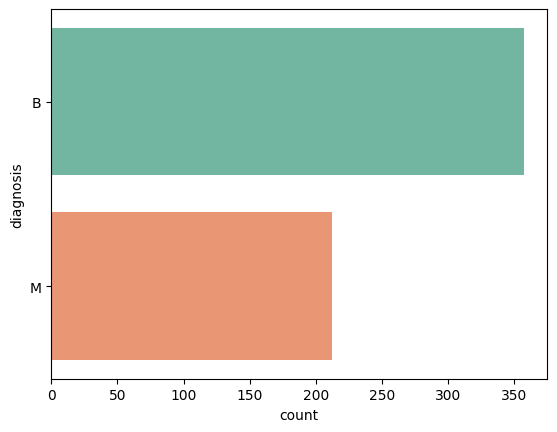

In [ ]:
# Count each label
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

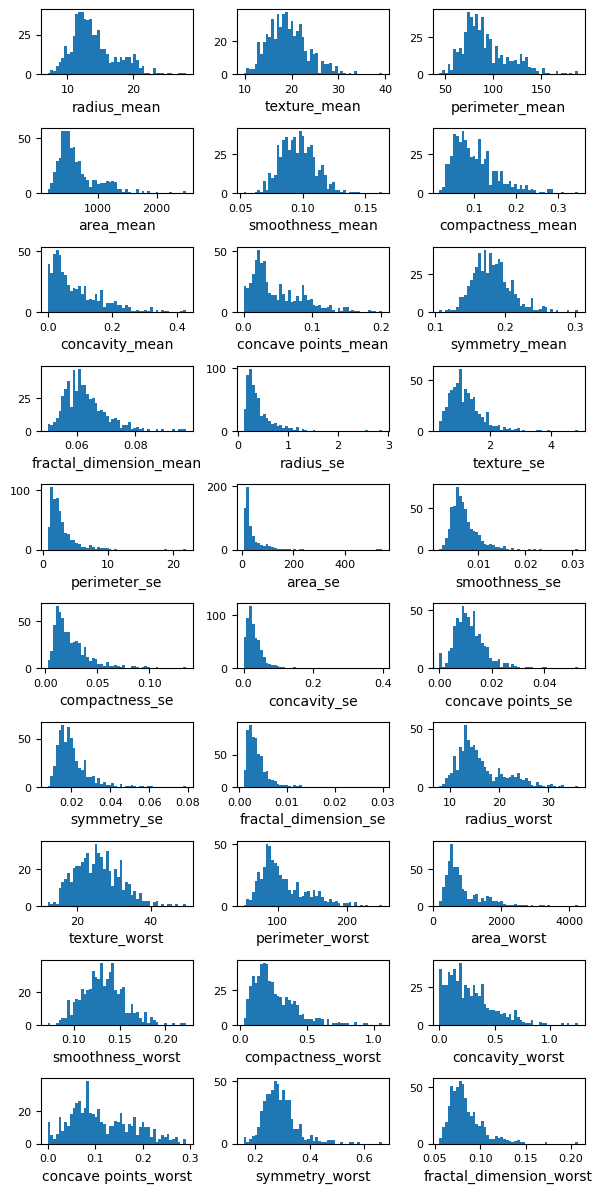

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(6,12))
axes = axes.flatten()

for i, column in enumerate(df1.columns):

    axes[i].hist(df1[column], bins=50)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


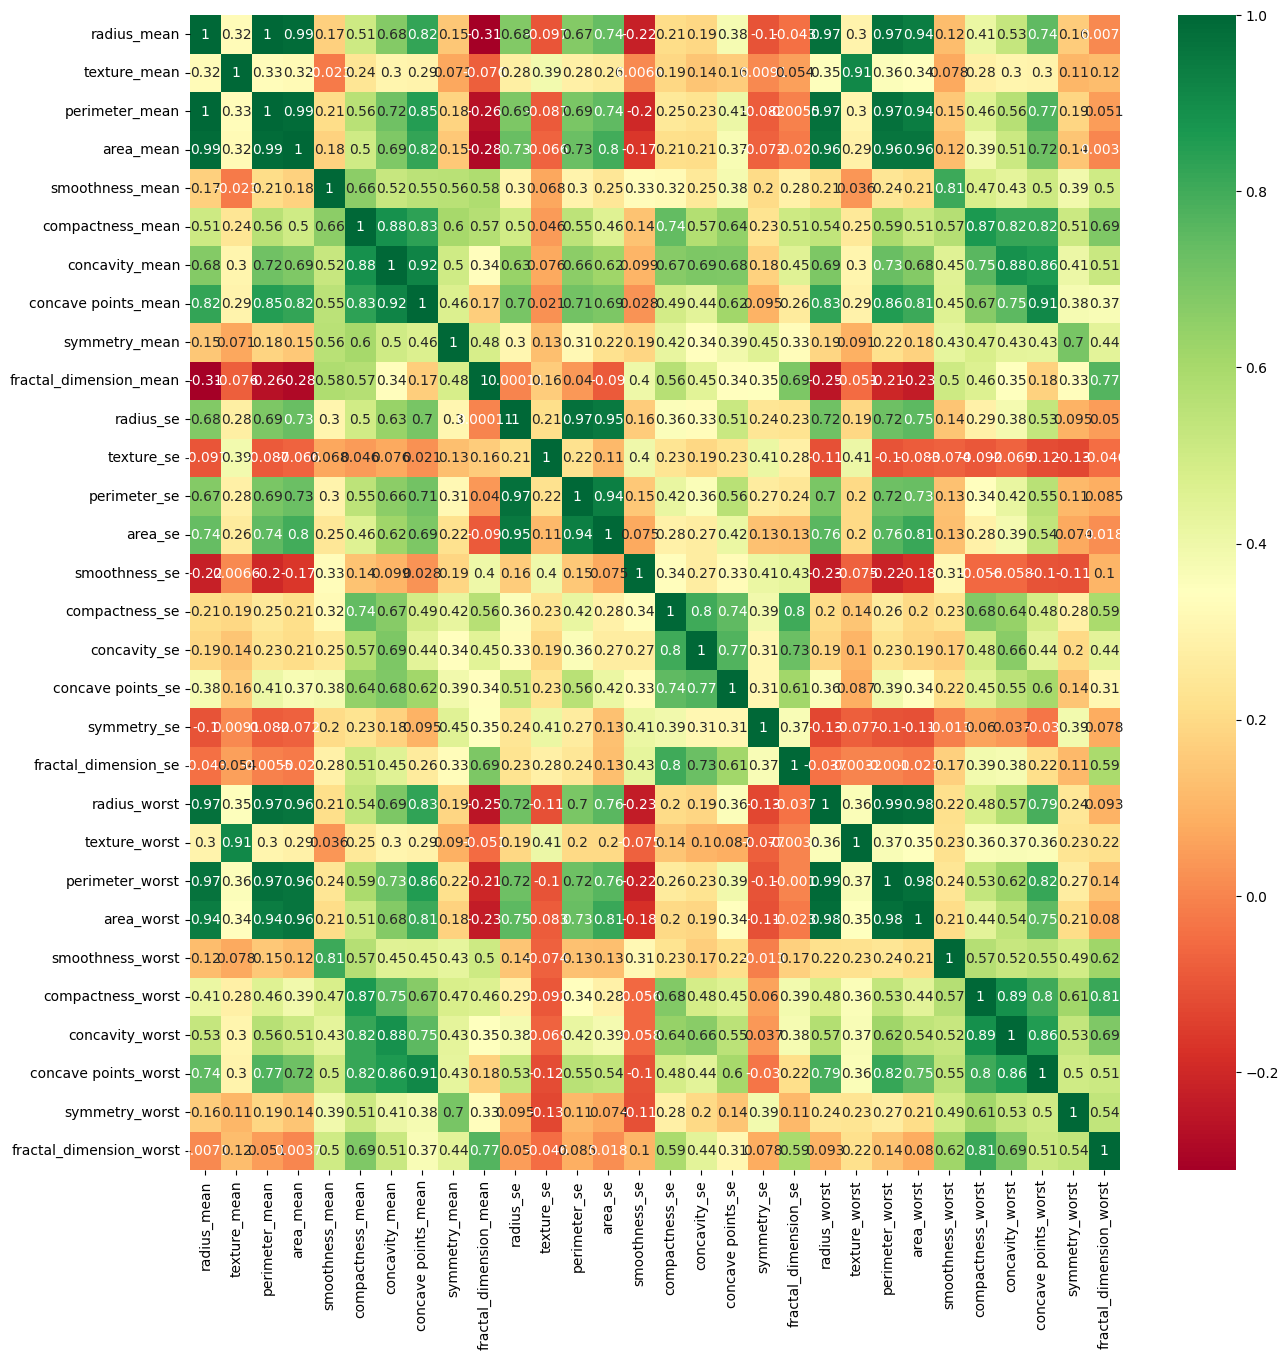

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [ ]:
df.replace({"B":0,"M":1},inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.190,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,...,21.580,29.33,140.50,1436.0,0.1558,0.2567,0.3889,0.19840,0.3216,0.07570
1,0,13.900,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,...,16.410,26.42,104.40,830.5,0.1064,0.1415,0.1673,0.08150,0.2356,0.07603
2,0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,...,14.440,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.10800,0.2668,0.08174
3,0,12.200,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,...,13.750,21.38,91.11,583.1,0.1256,0.1928,0.1167,0.05556,0.2661,0.07961
4,0,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,...,8.678,31.89,54.49,223.6,0.1596,0.3064,0.3393,0.05000,0.2790,0.10660


In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 357, 1: 212})


In [ ]:
#Under sampling train data
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)

print('original training dataset shape:', Counter(y_train))
print('Resample training dataset shape', Counter(y_rus))
print(f"Testing target statistics: {Counter(y_test)}")

original training dataset shape: Counter({0: 288, 1: 167})
Resample training dataset shape Counter({0: 167, 1: 167})
Testing target statistics: Counter({0: 69, 1: 45})


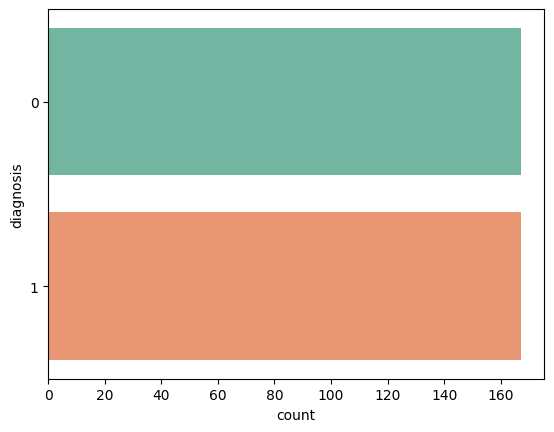

In [ ]:
ax = sns.countplot(y=y_rus, data=x_rus, palette='Set2')

In [ ]:
# Create a StandardScaler object and fit it to the undersampling training data
scaler = StandardScaler()
scaler.fit(x_rus)

# Transform the undersample training and test sets using the StandardScaler object
X_train_rus_scaled = scaler.transform(x_rus)
X_test_rus_scaled = scaler.transform(X_test)

In [ ]:
#Over sampling data
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

print('original training dataset shape:', Counter(y_train))
print('Resample training dataset shape', Counter(y_res))
print(f"Testing target statistics: {Counter(y_test)}")

original training dataset shape: Counter({0: 288, 1: 167})
Resample training dataset shape Counter({1: 288, 0: 288})
Testing target statistics: Counter({0: 69, 1: 45})


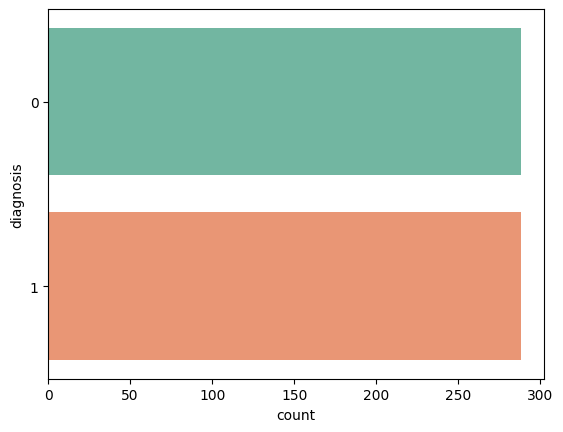

In [ ]:
ax = sns.countplot(y=y_res, data=X_res, palette='Set2')

In [ ]:
# Create a StandardScaler object and fit it to the oversampling training data
scaler = StandardScaler()
scaler.fit(X_res)

# Transform the training and test sets using the StandardScaler object
X_train_res_scaled = scaler.transform(X_res)
X_test_res_scaled = scaler.transform(X_test)

In [ ]:
mlflow.set_tracking_uri("sqlite:///BC.db")

mlflow.set_experiment("Classification of Breast Cancer")

2023/03/30 18:44:41 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/03/30 18:44:41 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='/content/mlruns/1', creation_time=1680201882518, experiment_id='1', last_update_time=1680201882518, lifecycle_stage='active', name='Classification of Breast Cancer', tags={}>

In [ ]:
dump(scaler, open('pickle_files/standard_scaler_bc.pkl', 'wb'))

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'none', 'C': 0.1}
Evaluating Logistic Regression with best hyperparameters...
Logistic Regression 5-fold cross-validation scores: [0.95575221 0.98230088 0.98214286 0.98214286 0.99107143]
Logistic Regression mean accuracy: 0.9787 (+/- 0.0120)
Logistic Regression test accuracy: 0.9912
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.97      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



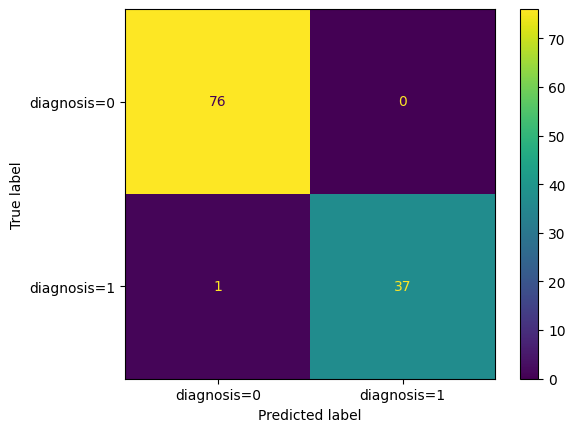

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Evaluating SVM with best hyperparameters...
SVM 5-fold cross-validation scores: [0.97345133 0.99115044 0.97321429 0.97321429 0.98214286]
SVM mean accuracy: 0.9786 (+/- 0.0071)
SVM test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.95      0.92      0.93        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



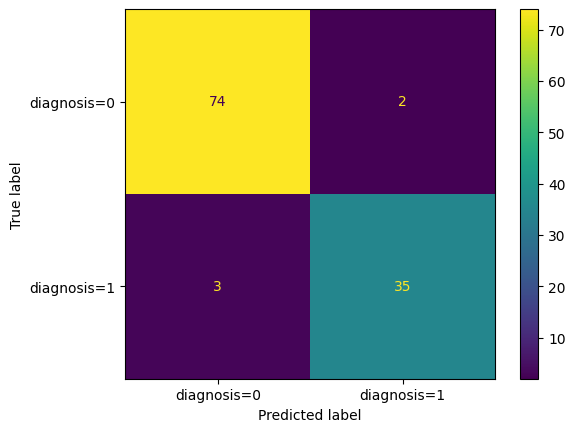

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 10}
Evaluating KNN with best hyperparameters...
KNN 5-fold cross-validation scores: [0.96460177 1.         0.97321429 1.         0.98214286]
KNN mean accuracy: 0.9840 (+/- 0.0142)
KNN test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.92      0.96        38

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



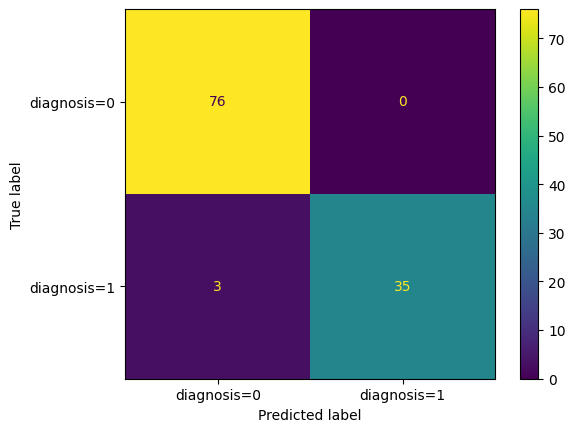

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 0.12328467394420659}
Evaluating Naive Bayes with best hyperparameters...
Naive Bayes 5-fold cross-validation scores: [0.91150442 0.96460177 0.92857143 0.91964286 0.95535714]
Naive Bayes mean accuracy: 0.9359 (+/- 0.0206)
Naive Bayes test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        76
           1       1.00      0.84      0.91        38

    accuracy                           0.95       114
   macro avg       0.96      0.92      0.94       114
weighted avg       0.95      0.95      0.95       114



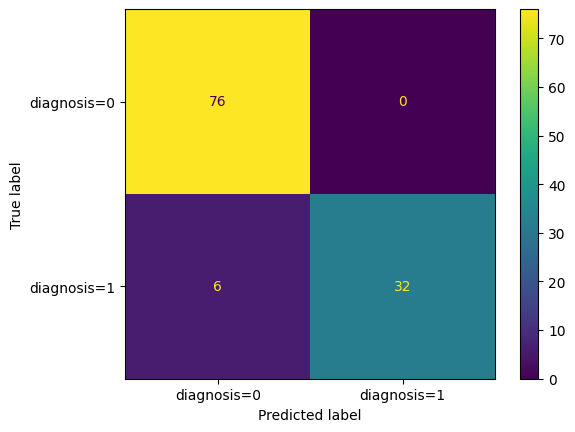

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Evaluating Decision Tree with best hyperparameters...
Decision Tree 5-fold cross-validation scores: [0.96460177 0.94690265 0.94642857 0.96428571 0.95535714]
Decision Tree mean accuracy: 0.9555 (+/- 0.0080)
Decision Tree test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.95      0.92      0.93        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



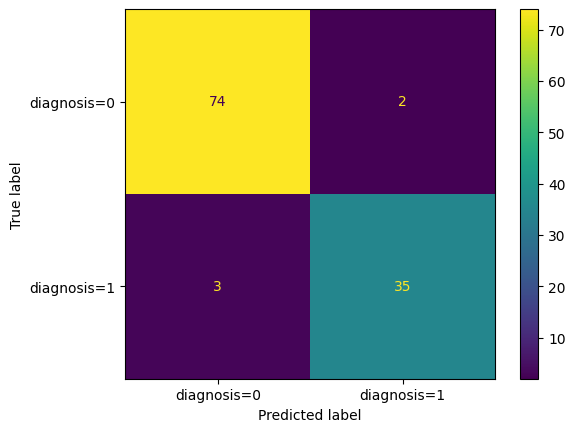

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Evaluating Random Forest with best hyperparameters...
Random Forest 5-fold cross-validation scores: [0.9380531  0.99115044 0.97321429 0.97321429 0.99107143]
Random Forest mean accuracy: 0.9733 (+/- 0.0194)
Random Forest test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.97      0.89      0.93        38

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



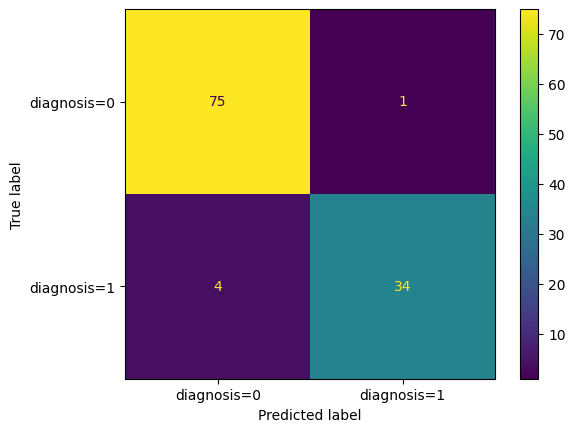

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'learning_rate': 0.1}
Evaluating GBM with best hyperparameters...
GBM 5-fold cross-validation scores: [0.95575221 1.         0.96428571 0.99107143 0.99107143]
GBM mean accuracy: 0.9804 (+/- 0.0172)
GBM test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.97      0.89      0.93        38

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



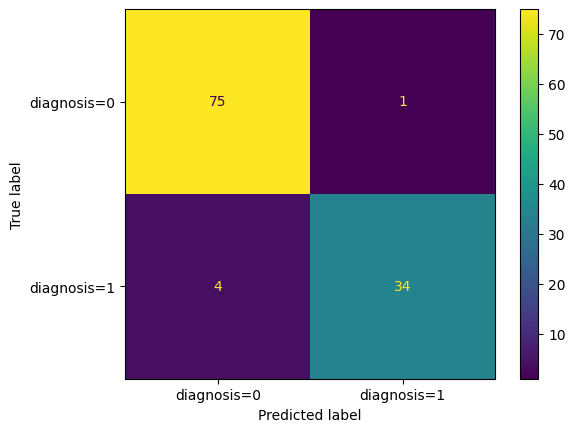

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}
Evaluating MLP with best hyperparameters...
MLP 5-fold cross-validation scores: [0.98230088 0.97345133 0.98214286 1.         0.99107143]
MLP mean accuracy: 0.9858 (+/- 0.0090)
MLP test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.95      0.95      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



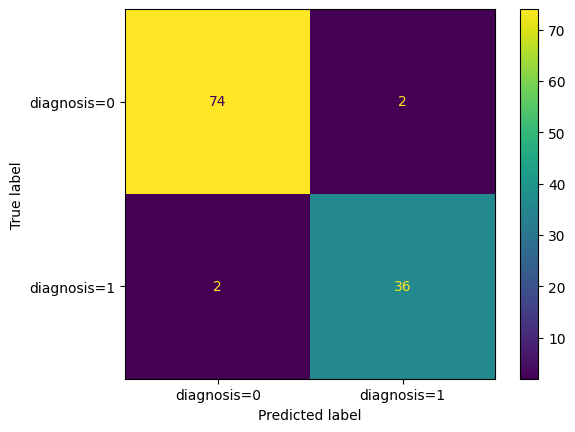

In [ ]:
# Define the hyperparameters for each algorithm
logistic_regression_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

knn_params = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

naive_bayes_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

mlp_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the classifiers
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()
mlp = MLPClassifier()

# Define the hyperparameters dictionary for each classifier
classifiers = {
    'Logistic Regression': [logistic_regression, logistic_regression_params],
    'SVM': [svm, svm_params],
    'KNN': [knn, knn_params],
    'Naive Bayes': [naive_bayes, naive_bayes_params],
    'Decision Tree': [decision_tree, decision_tree_params],
    'Random Forest': [random_forest, random_forest_params],
    'GBM': [gbm, gbm_params],
    'MLP': [mlp, mlp_params]
}
# Perform cross-validation on each classifier with best hyperparameters
for name, [classifier, params] in classifiers.items():
    with mlflow.start_run():
        mlflow.set_tag("dev", "Rinku")
        mlflow.set_tag("Balancing_Method", "OverSampling")
        mlflow.set_tag("Feature_Selection", "No")
        mlflow.set_tag("algo", name)
        mlflow.log_param("data-path", "data/bcd.csv")

        print(f'Evaluating {name} with best hyperparameters...')
        search = RandomizedSearchCV(
            classifier,
            params,
            cv=5,
            n_iter=10,
            random_state=42,
            n_jobs=-1
        )

        search.fit(X_train_res_scaled, y_res)
        best_params = search.best_params_
        print(f'Best hyperparameters for {name}: {best_params}')
        mlflow.log_params(best_params)

        # Evaluate the model with the best hyperparameters
        print(f'Evaluating {name} with best hyperparameters...')
        best_model = search.best_estimator_
        scores = cross_val_score(best_model, X_train_res_scaled, y_res, cv=5, scoring='accuracy')
        print(f'{name} 5-fold cross-validation scores: {scores}')
        print(f'{name} mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')
        best_model.fit(X_train_res_scaled, y_res)
        y_pred = best_model.predict(X_test_res_scaled)
        score = metrics.accuracy_score(y_test, y_pred)

        print(f'{name} test accuracy: {score:.4f}')
        mlflow.log_metric("accuracy", score)
        mlflow.sklearn.log_model(best_model, artifact_path="models")
        mlflow.log_artifact("pickle_files/standard_scaler_bc.pkl")

        print(classification_report(y_test, y_pred))

        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, y_pred), display_labels=["diagnosis=0", "diagnosis=1"])
        cm_display.plot()
        plt.show()

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'l2', 'C': 1}
Evaluating Logistic Regression with best hyperparameters...
Logistic Regression 5-fold cross-validation scores: [0.97142857 0.97142857 0.98571429 0.98550725 0.95652174]
Logistic Regression mean accuracy: 0.9741 (+/- 0.0108)
Logistic Regression test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.95      0.97      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



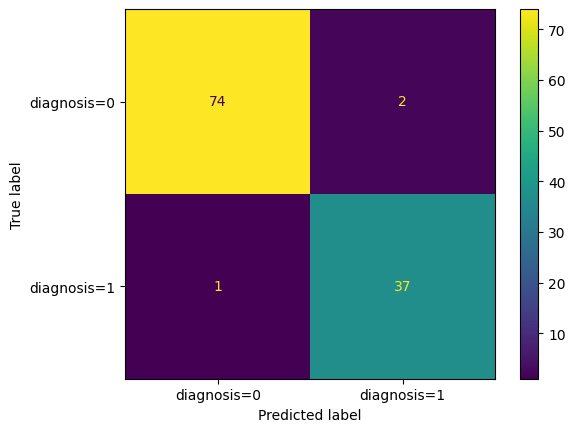

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Evaluating SVM with best hyperparameters...
SVM 5-fold cross-validation scores: [0.97142857 0.97142857 1.         0.97101449 0.98550725]
SVM mean accuracy: 0.9799 (+/- 0.0115)
SVM test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       0.90      0.97      0.94        38

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



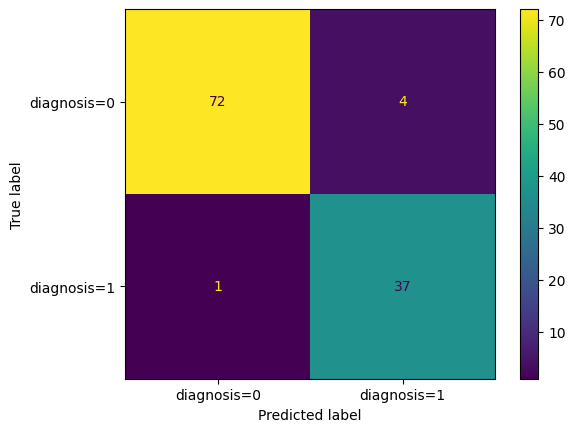

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
Evaluating KNN with best hyperparameters...
KNN 5-fold cross-validation scores: [0.98571429 0.97142857 0.98571429 0.98550725 0.95652174]
KNN mean accuracy: 0.9770 (+/- 0.0116)
KNN test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.95      0.92      0.93        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



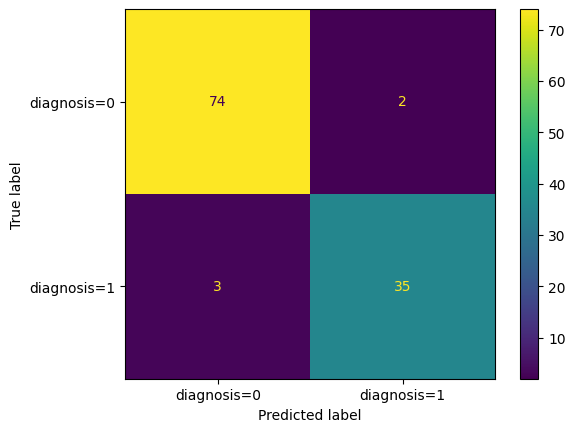

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}
Evaluating Naive Bayes with best hyperparameters...
Naive Bayes 5-fold cross-validation scores: [0.88571429 0.92857143 0.97142857 0.92753623 0.91304348]
Naive Bayes mean accuracy: 0.9253 (+/- 0.0278)
Naive Bayes test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       1.00      0.87      0.93        38

    accuracy                           0.96       114
   macro avg       0.97      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



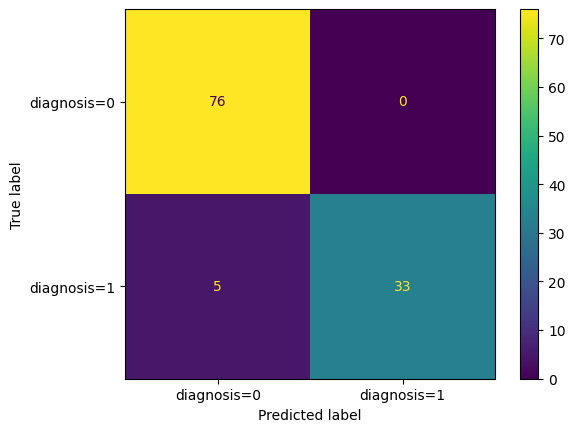

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
Evaluating Decision Tree with best hyperparameters...
Decision Tree 5-fold cross-validation scores: [0.94285714 0.92857143 0.94285714 0.94202899 0.97101449]
Decision Tree mean accuracy: 0.9455 (+/- 0.0139)
Decision Tree test accuracy: 0.8947
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.84      0.84      0.84        38

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



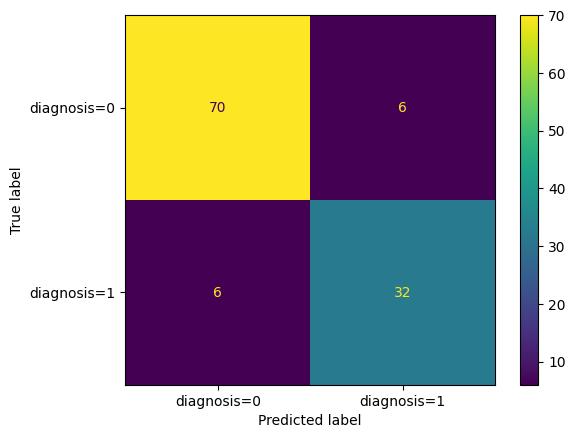

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Evaluating Random Forest with best hyperparameters...
Random Forest 5-fold cross-validation scores: [0.94285714 0.95714286 0.95714286 0.98550725 0.95652174]
Random Forest mean accuracy: 0.9598 (+/- 0.0139)
Random Forest test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.92      0.95      0.94        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



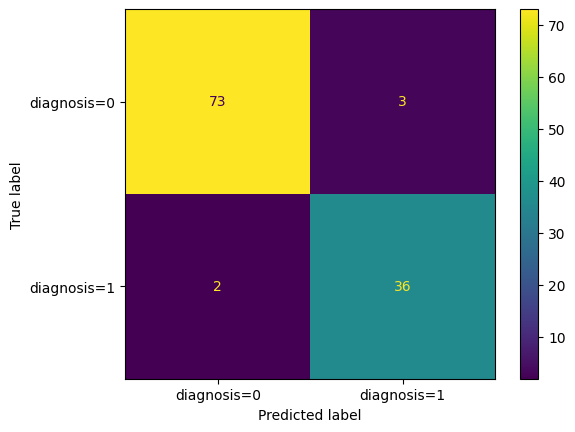

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.5}
Evaluating GBM with best hyperparameters...
GBM 5-fold cross-validation scores: [0.97142857 0.95714286 0.98571429 0.97101449 0.95652174]
GBM mean accuracy: 0.9684 (+/- 0.0108)
GBM test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



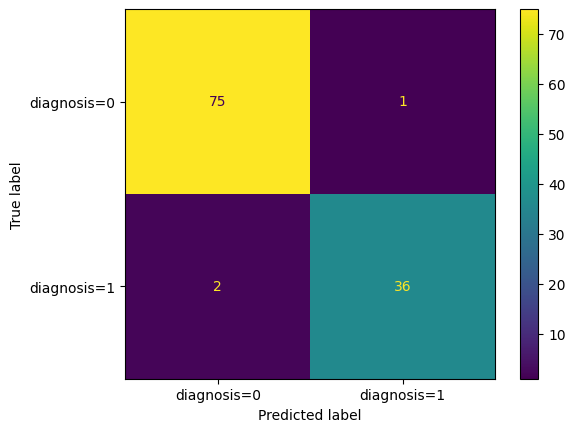

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}
Evaluating MLP with best hyperparameters...
MLP 5-fold cross-validation scores: [0.97142857 0.97142857 1.         0.95652174 0.98550725]
MLP mean accuracy: 0.9770 (+/- 0.0147)
MLP test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.93      0.97      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



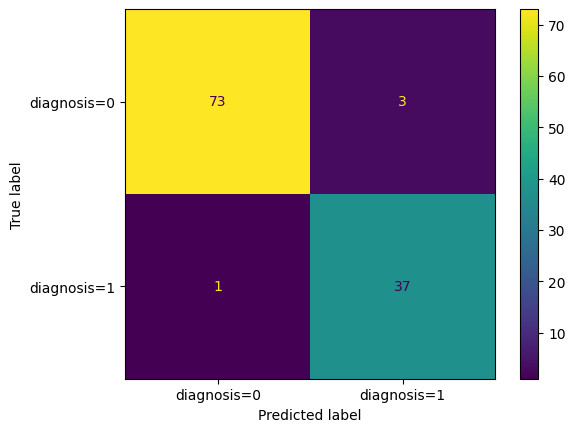

In [ ]:
# Define the hyperparameters for each algorithm
logistic_regression_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

knn_params = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

naive_bayes_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

mlp_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the classifiers
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()
mlp = MLPClassifier()

# Define the hyperparameters dictionary for each classifier
classifiers = {
    'Logistic Regression': [logistic_regression, logistic_regression_params],
    'SVM': [svm, svm_params],
    'KNN': [knn, knn_params],
    'Naive Bayes': [naive_bayes, naive_bayes_params],
    'Decision Tree': [decision_tree, decision_tree_params],
    'Random Forest': [random_forest, random_forest_params],
    'GBM': [gbm, gbm_params],
    'MLP': [mlp, mlp_params]
}

# Define the hyperparameters for each algorithm
logistic_regression_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

knn_params = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

naive_bayes_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

mlp_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the classifiers
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()
mlp = MLPClassifier()

# Define the hyperparameters dictionary for each classifier
classifiers = {
    'Logistic Regression': [logistic_regression, logistic_regression_params],
    'SVM': [svm, svm_params],
    'KNN': [knn, knn_params],
    'Naive Bayes': [naive_bayes, naive_bayes_params],
    'Decision Tree': [decision_tree, decision_tree_params],
    'Random Forest': [random_forest, random_forest_params],
    'GBM': [gbm, gbm_params],
    'MLP': [mlp, mlp_params]
}
# Perform cross-validation on each classifier with best hyperparameters
for name, [classifier, params] in classifiers.items():
    with mlflow.start_run():
        mlflow.set_tag("dev", "Rinku")
        mlflow.set_tag("Balancing_Method", "UnderSampling")
        mlflow.set_tag("Feature_Selection", "No")
        mlflow.set_tag("algo", name)
        mlflow.log_param("data-path", "data/bcd.csv")

        print(f'Evaluating {name} with best hyperparameters...')
        search = RandomizedSearchCV(
            classifier,
            params,
            cv=5,
            n_iter=10,
            random_state=42,
            n_jobs=-1
        )

        search.fit(X_train_rus_scaled, y_rus)
        best_params = search.best_params_
        print(f'Best hyperparameters for {name}: {best_params}')
        mlflow.log_params(best_params)

        # Evaluate the model with the best hyperparameters
        print(f'Evaluating {name} with best hyperparameters...')
        best_model = search.best_estimator_
        scores = cross_val_score(best_model, X_train_rus_scaled, y_rus, cv=5, scoring='accuracy')
        print(f'{name} 5-fold cross-validation scores: {scores}')
        print(f'{name} mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')
        best_model.fit(X_train_rus_scaled, y_rus)
        y_pred = best_model.predict(X_test_rus_scaled)
        score = metrics.accuracy_score(y_test, y_pred)

        print(f'{name} test accuracy: {score:.4f}')
        mlflow.log_metric("accuracy", score)
        mlflow.sklearn.log_model(best_model, artifact_path="models")
        mlflow.log_artifact("pickle_files/standard_scaler_bc.pkl")

        print(classification_report(y_test, y_pred))

        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, y_pred), display_labels=["diagnosis=0", "diagnosis=1"])
        cm_display.plot()
        plt.show()

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'l2', 'C': 1}



Logistic Regression 5-fold cross-validation scores: [0.9380531  0.98230088 0.92857143 0.95535714 0.95535714]
Logistic Regression mean accuracy: 0.9519 (+/- 0.0184)
Logistic Regression test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



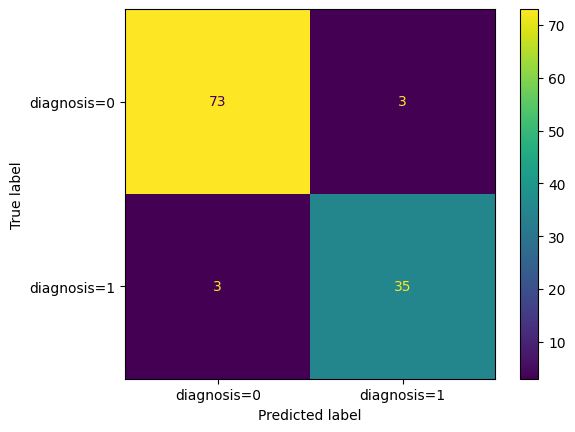

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'none', 'C': 0.1}



Logistic Regression 5-fold cross-validation scores: [0.94690265 0.98230088 0.97321429 0.97321429 0.98214286]
Logistic Regression mean accuracy: 0.9716 (+/- 0.0130)
Logistic Regression test accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.97      0.97      0.97        38

    accuracy                 

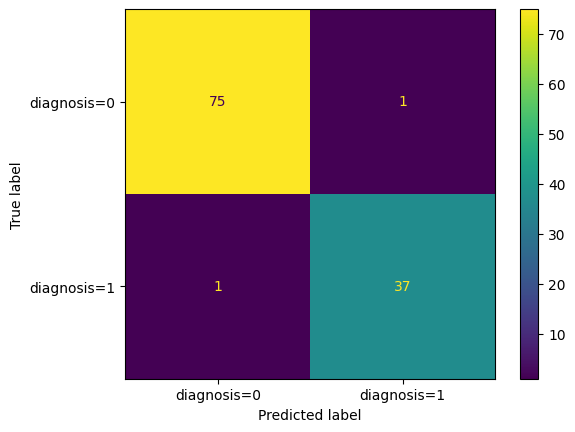

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}



Logistic Regression 5-fold cross-validation scores: [0.95575221 0.99115044 0.96428571 0.98214286 0.99107143]
Logistic Regression mean accuracy: 0.9769 (+/- 0.0144)
Logistic Regression test accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.97      0.97      0.97        38

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



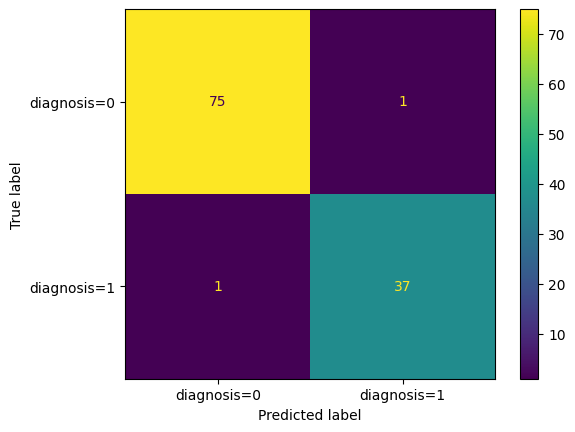

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'none', 'C': 0.1}



Logistic Regression 5-fold cross-validation scores: [0.94690265 0.99115044 0.96428571 0.98214286 0.99107143]
Logistic Regression mean accuracy: 0.9751 (+/- 0.0172)
Logistic Regression test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.92      0.95      0.94        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



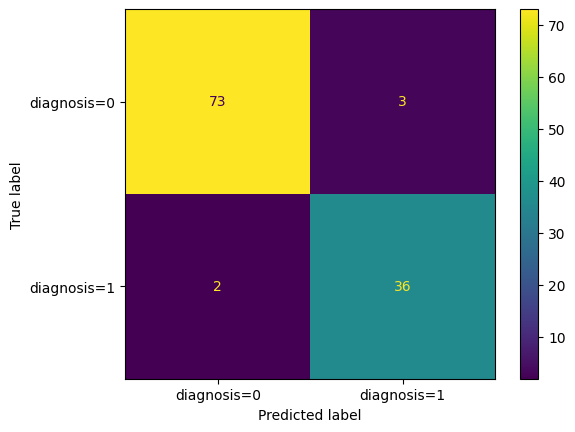

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'l2', 'C': 1}



Logistic Regression 5-fold cross-validation scores: [0.9380531  0.98230088 0.92857143 0.95535714 0.95535714]
Logistic Regression mean accuracy: 0.9519 (+/- 0.0184)
Logistic Regression test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      

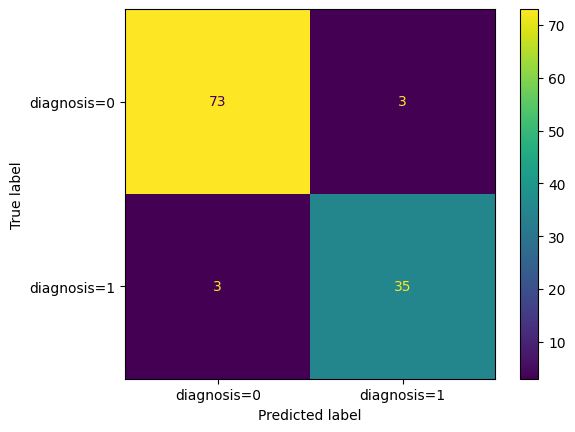

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}



SVM 5-fold cross-validation scores: [0.94690265 0.98230088 0.95535714 0.95535714 0.96428571]
SVM mean accuracy: 0.9608 (+/- 0.0121)
SVM test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.94      0.89      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



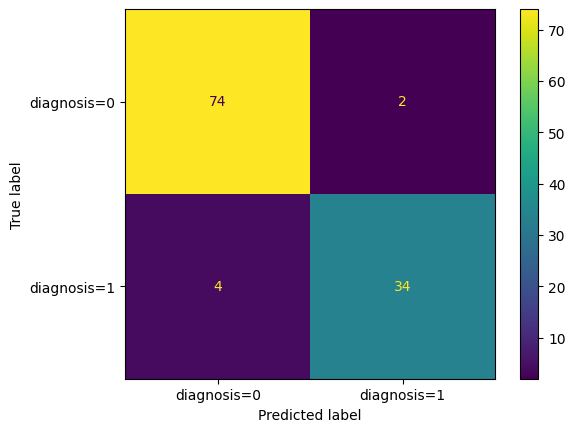

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 100}



SVM 5-fold cross-validation scores: [0.94690265 0.98230088 0.97321429 0.97321429 0.99107143]
SVM mean accuracy: 0.9733 (+/- 0.0148)
SVM test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.92      0.95      0.94        

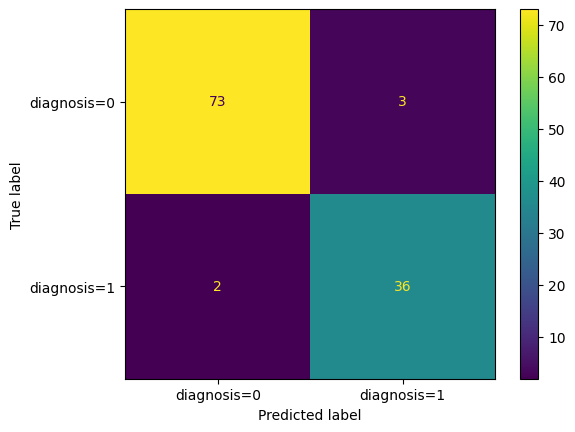

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}



SVM 5-fold cross-validation scores: [0.97345133 0.99115044 0.96428571 0.98214286 0.98214286]
SVM mean accuracy: 0.9786 (+/- 0.0091)
SVM test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       1.00      0.89      0.94        38

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



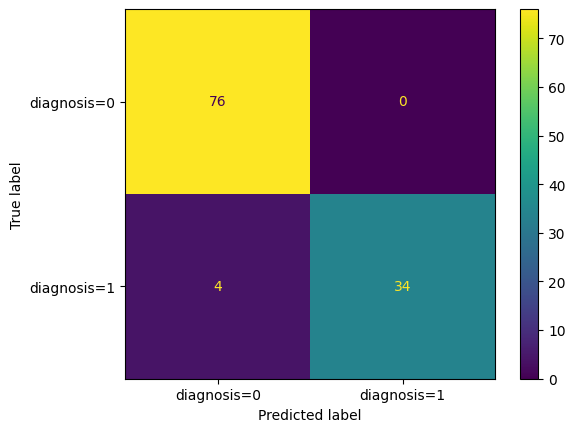

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}



SVM 5-fold cross-validation scores: [0.94690265 0.98230088 0.98214286 0.95535714 0.99107143]
SVM mean accuracy: 0.9716 (+/- 0.0172)
SVM test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



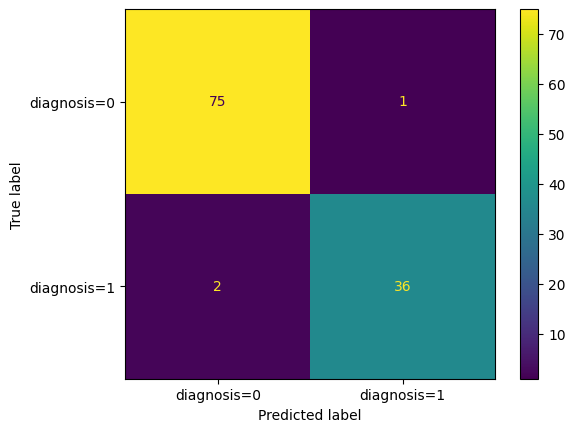

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}



SVM 5-fold cross-validation scores: [0.94690265 0.98230088 0.96428571 0.95535714 0.96428571]
SVM mean accuracy: 0.9626 (+/- 0.0118)
SVM test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.97      0.92      0.95        38

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



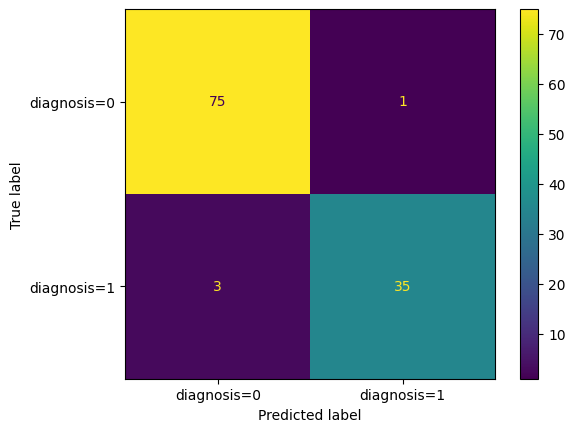

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}



KNN 5-fold cross-validation scores: [0.98230088 0.98230088 0.97321429 0.98214286 0.98214286]
KNN mean accuracy: 0.9804 (+/- 0.0036)
KNN test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.87      0.89      0.88        38

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



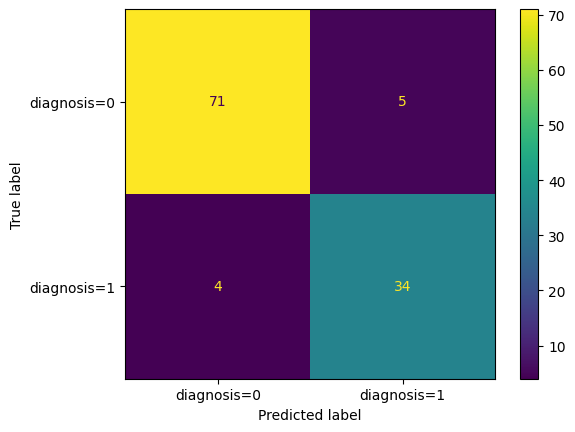

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'symmetry_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 10}



KNN 5-fold cross-validation scores: [0.99115044 1.         0.96428571 0.98214286 0.99107143]
KNN mean accuracy: 0.9857 (+/- 0.0121)
KNN test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.97      0.

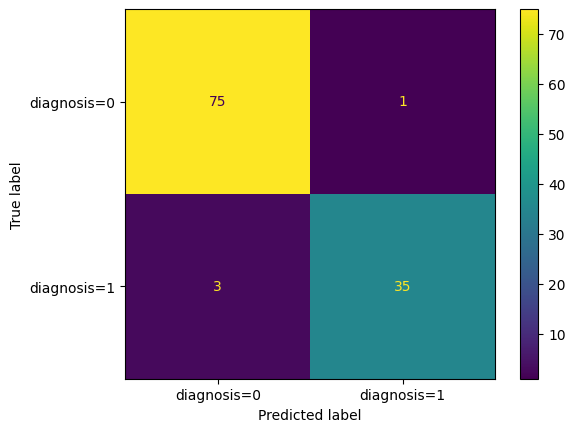

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 20}



KNN 5-fold cross-validation scores: [0.97345133 0.98230088 0.95535714 0.99107143 0.99107143]
KNN mean accuracy: 0.9787 (+/- 0.0134)
KNN test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



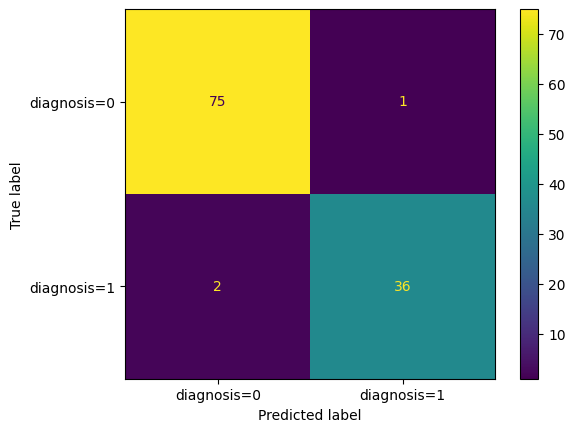

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}



KNN 5-fold cross-validation scores: [0.97345133 0.99115044 0.96428571 0.99107143 0.99107143]
KNN mean accuracy: 0.9822 (+/- 0.0113)
KNN test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        76
           1       0.88      0.95      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



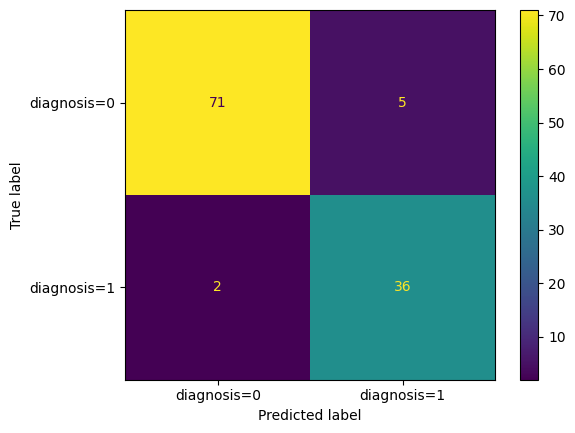

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['perimeter_mean', 'area_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 10}



KNN 5-fold cross-validation scores: [0.97345133 0.98230088 0.95535714 0.97321429 0.99107143]
KNN mean accuracy: 0.9751 (+/- 0.0119)
KNN test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



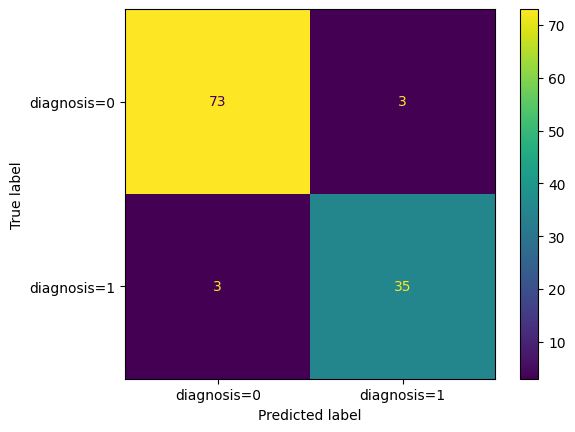

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}



Naive Bayes 5-fold cross-validation scores: [0.92035398 0.96460177 0.91964286 0.95535714 0.95535714]
Naive Bayes mean accuracy: 0.9431 (+/- 0.0191)
Naive Bayes test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        76
           1       0.97      0.84      0.90        38

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



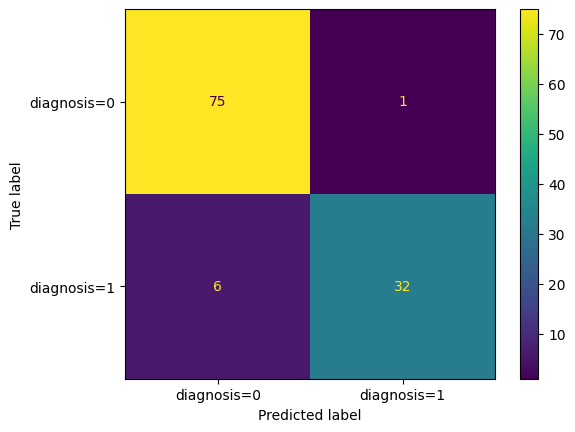

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}



Naive Bayes 5-fold cross-validation scores: [0.92035398 0.96460177 0.94642857 0.9375     0.95535714]
Naive Bayes mean accuracy: 0.9448 (+/- 0.0152)
Naive Bayes test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        76
           1       0.97      0.84      0.90        38

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94 

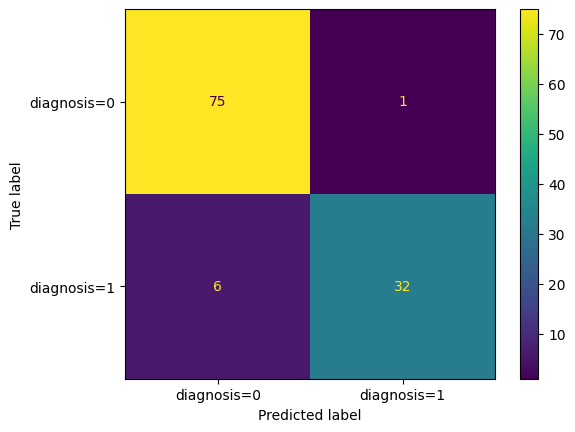

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 0.01}



Naive Bayes 5-fold cross-validation scores: [0.91150442 0.94690265 0.92857143 0.91071429 0.9375    ]
Naive Bayes mean accuracy: 0.9270 (+/- 0.0142)
Naive Bayes test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.94      0.87      0.90        38

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



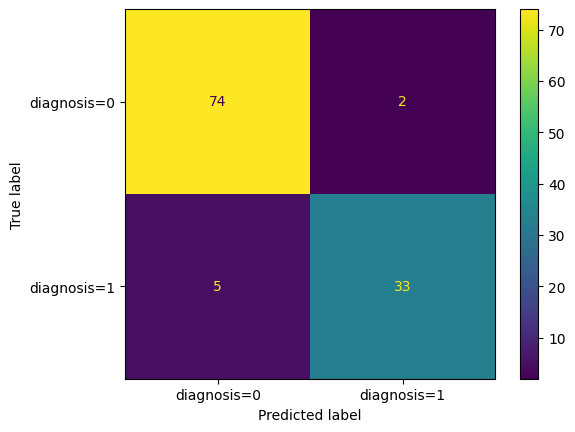

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}



Naive Bayes 5-fold cross-validation scores: [0.9380531  0.98230088 0.98214286 0.95535714 0.99107143]
Naive Bayes mean accuracy: 0.9698 (+/- 0.0199)
Naive Bayes test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



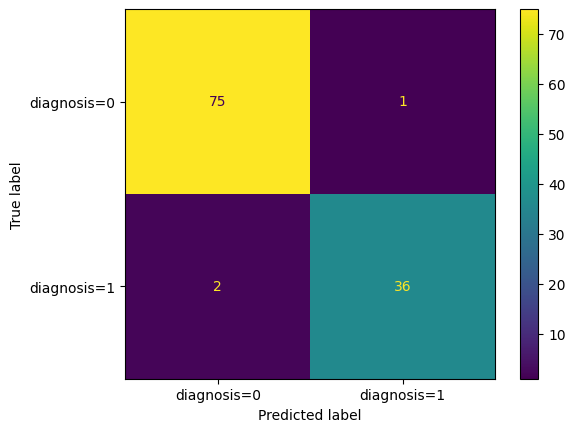

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}



Naive Bayes 5-fold cross-validation scores: [0.91150442 0.96460177 0.94642857 0.9375     0.95535714]
Naive Bayes mean accuracy: 0.9431 (+/- 0.0182)
Naive Bayes test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        76
           1       0.97      0.84      0.90        38

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



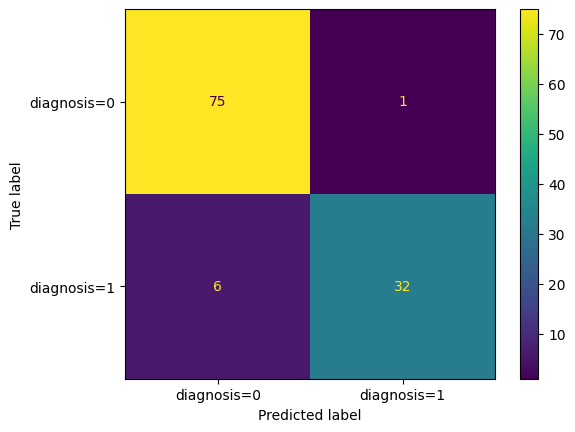

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}



Decision Tree 5-fold cross-validation scores: [0.91150442 0.9380531  0.95535714 0.9375     0.9375    ]
Decision Tree mean accuracy: 0.9360 (+/- 0.0140)
Decision Tree test accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        76
           1       0.92      0.87      0.89        38

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg    

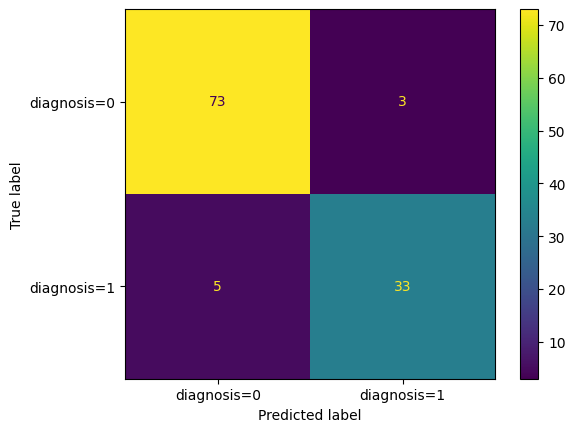

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}



Decision Tree 5-fold cross-validation scores: [0.

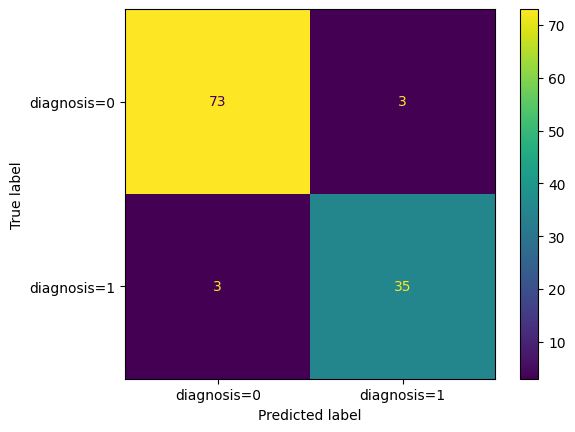

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}



Decision Tree 5-fold cross-validation scores: [0.90265487 0.91150442 0.92857143 0.97321429 0.91964286]
Decision Tree mean accuracy: 0.9271 (+/- 0.0246)
Decision Tree test accuracy: 0.9123
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        76
           1       0.97      0.76      0.85        38

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



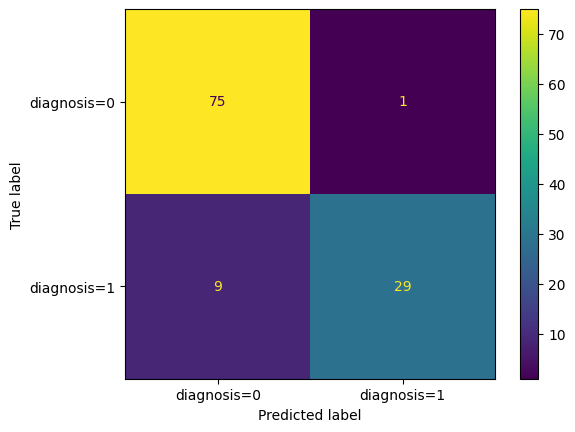

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}



Decision Tree 5-fold cross-validation scores: [0.97345133 0.98230088 0.98214286 0.99107143 0.98214286]
Decision Tree mean accuracy: 0.9822 (+/- 0.0056)
Decision Tree test accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        76
           1       0.86      0.95      0.90        38

    accuracy                           0.93       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



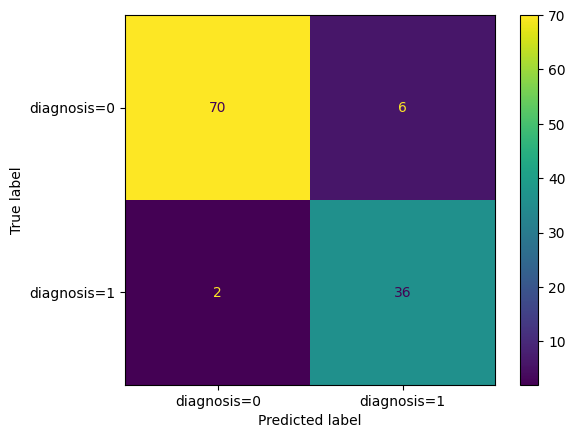

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}



Decision Tree 5-fold cross-validation scores: [0.94690265 0.94690265 0.91964286 0.97321429 0.99107143]
Decision Tree mean accuracy: 0.9555 (+/- 0.0245)
Decision Tree test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.95      0.92      0.93        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.9

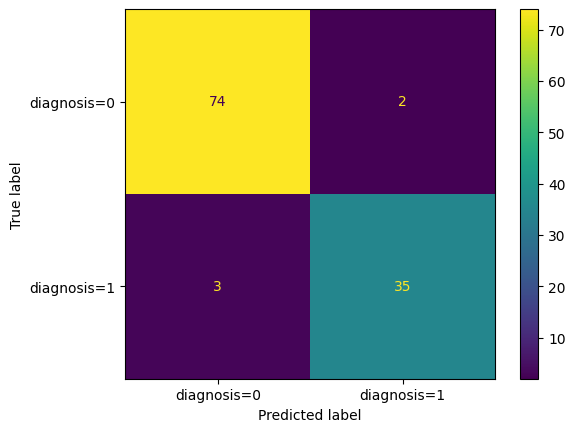

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}



Random Forest 5-fold cross-validation scores: [0.94690265 0.97345133 0.94642857 0.96428571 0.97321429]
Random Forest mean accuracy: 0.9609 (+/- 0.0120)
Random Forest test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        76
           1       0.92      0.89      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg      

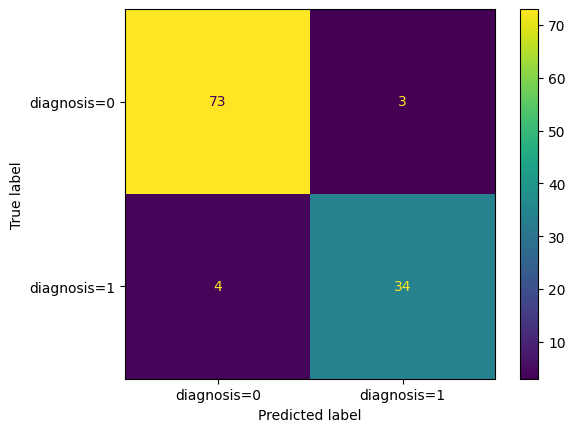

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}



Random Forest 5-fold cross-validation scores: [0.95575221 0.98230088 0

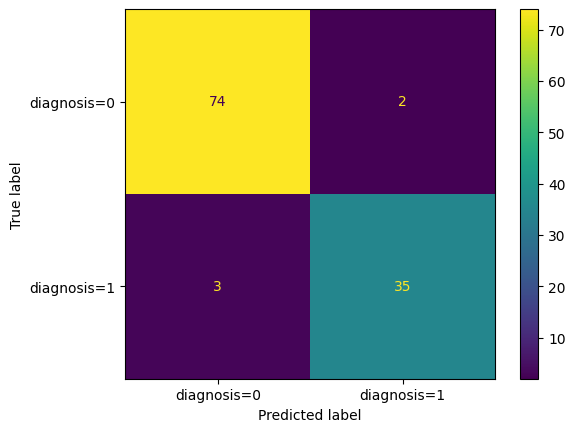

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}



Random Forest 5-fold cross-validation scores: [0.95575221 0.99115044 0.9375     0.98214286 0.98214286]
Random Forest mean accuracy: 0.9697 (+/- 0.0200)
Random Forest test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       1.00      0.87      0.93        38

    accuracy                           0.96       114
   macro avg       0.97      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



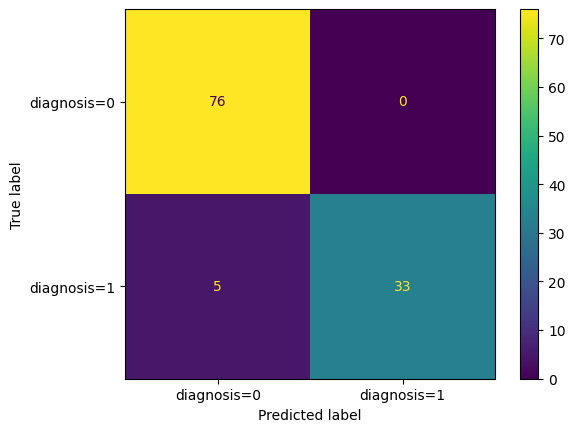

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}



Random Forest 5-fold cross-validation scores: [0.96460177 0.99115044 0.97321429 0.99107143 0.98214286]
Random Forest mean accuracy: 0.9804 (+/- 0.0103)
Random Forest test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        76
           1       0.88      0.95      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



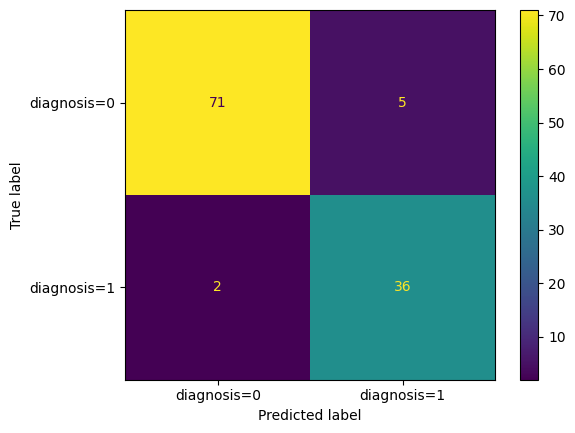

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}



Random Forest 5-fold cross-validation scores: [0.94690265 0.97345133 0.95535714 0.97321429 0.98214286]
Random Forest mean accuracy: 0.9662 (+/- 0.0130)
Random Forest test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.94      0.89      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95  

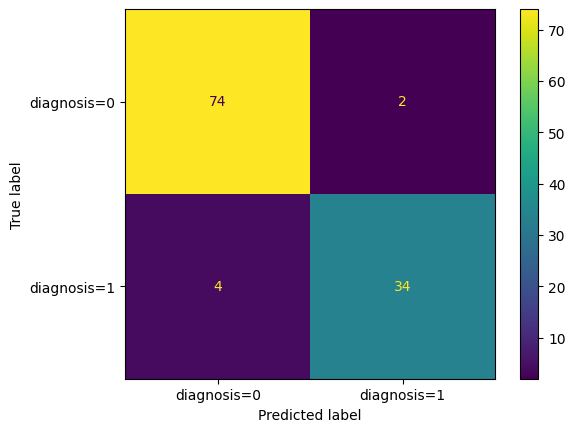

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'learning_rate': 0.1}



GBM 5-fold cross-validation scores: [0.95575221 0.97345133 0.95535714 0.96428571 0.99107143]
GBM mean accuracy: 0.9680 (+/- 0.0133)
GBM test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.94      0.89      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.9

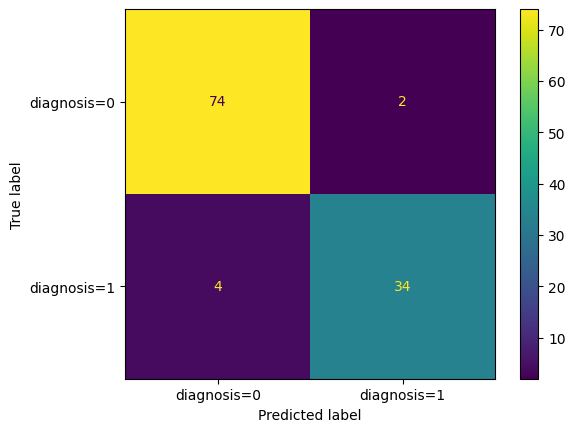

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'learning_rate': 0.1}



GBM 5-fold cross-validation scores: [0.9557522

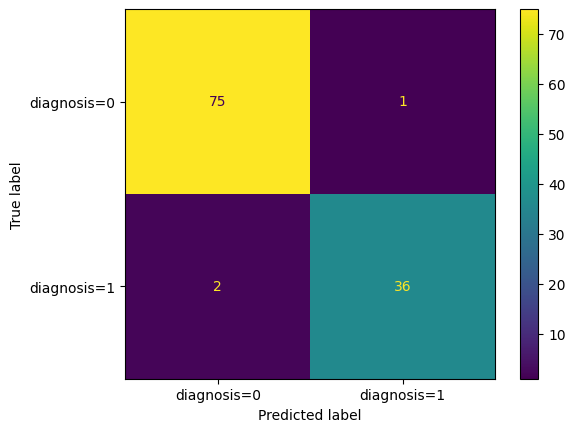

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'learning_rate': 0.1}



GBM 5-fold cross-validation scores: [0.96460177 1.         0.9375     0.98214286 0.98214286]
GBM mean accuracy: 0.9733 (+/- 0.0211)
GBM test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       1.00      0.89      0.94        38

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



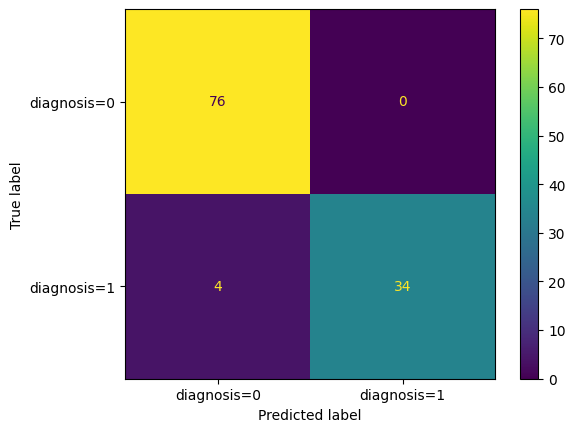

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'learning_rate': 0.01}



GBM 5-fold cross-validation scores: [0.97345133 0.97345133 0.96428571 0.99107143 0.99107143]
GBM mean accuracy: 0.9787 (+/- 0.0107)
GBM test accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        76
           1       0.86      0.95      0.90        38

    accuracy                           0.93       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



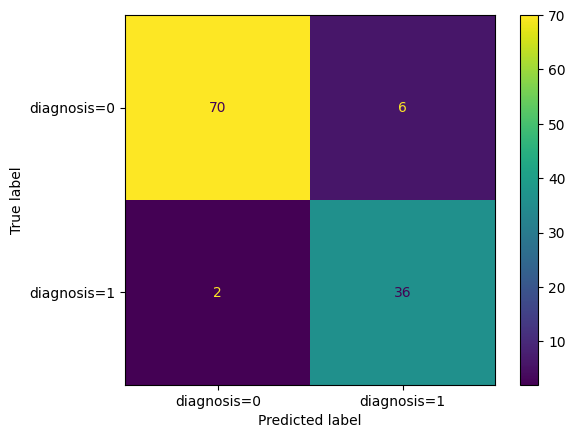

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.5}



GBM 5-fold cross-validation scores: [0.9380531  0.97345133 0.97321429 0.96428571 0.98214286]
GBM mean accuracy: 0.9662 (+/- 0.0152)
GBM test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.94      0.87      0.90        38

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0

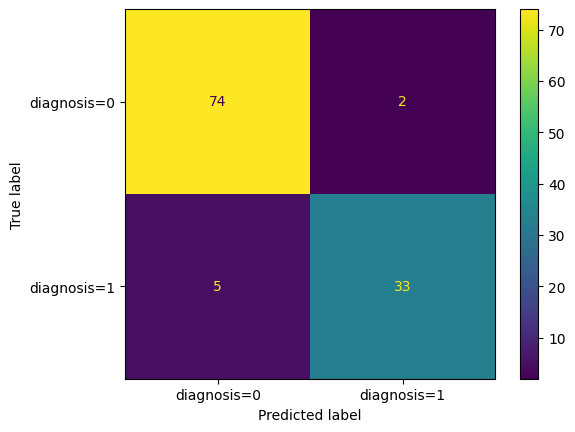

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.95575221 0.97345133 0.94642857 0.96428571 0.98214286]
MLP mean accuracy: 0.9644 (+/- 0.0126)
MLP test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.95      0.95      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



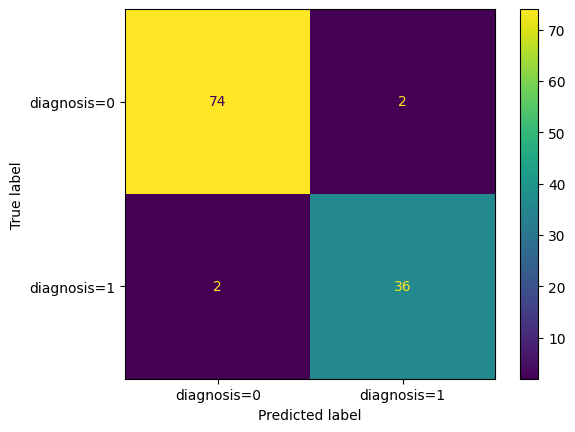

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.98230088 1.         0.98214286 1.         0.98214286]
MLP mean accuracy: 0.9893 (+/- 0.0

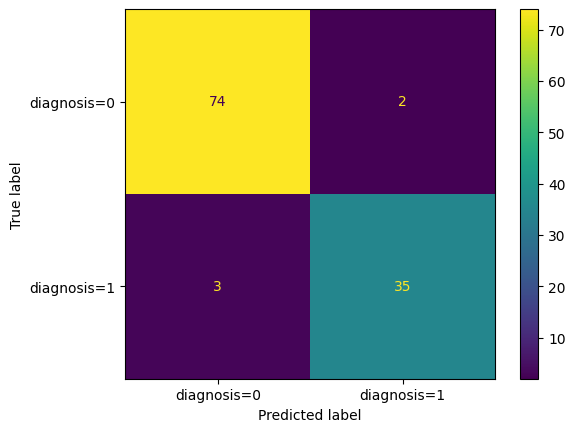

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.05, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.97345133 0.99115044 0.98214286 1.         0.97321429]
MLP mean accuracy: 0.9840 (+/- 0.0104)
MLP test accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.95      0.97        38

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



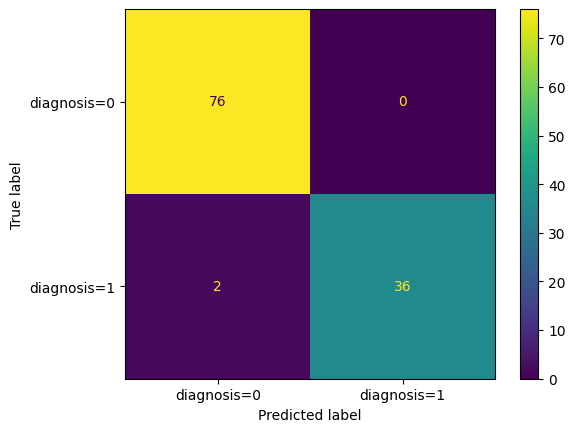

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'perimeter_worst' 'compactness_mean' 'radius_se' 'concave points_mean'
 'area_mean' 'area_se']

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.9380531  0.99115044 0.98214286 0.95535714 0.99107143]
MLP mean accuracy: 0.9716 (+/- 0.0213)
MLP test accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.92      0.95      0.94        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



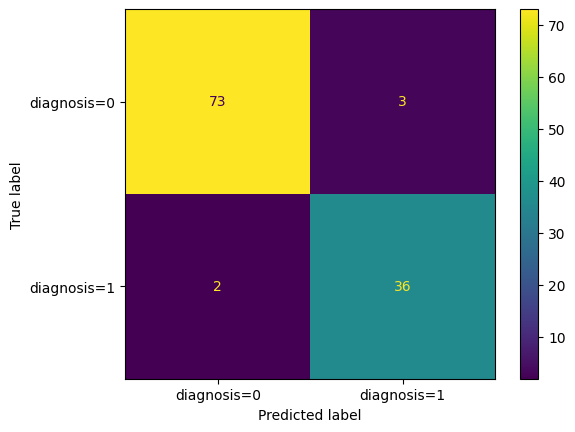

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.94690265 0.98230088 0.92857143 0.95535714 0.98214286]
MLP mean accuracy: 0.9591 (+/- 0.0208)
MLP test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.94      0.89      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95     

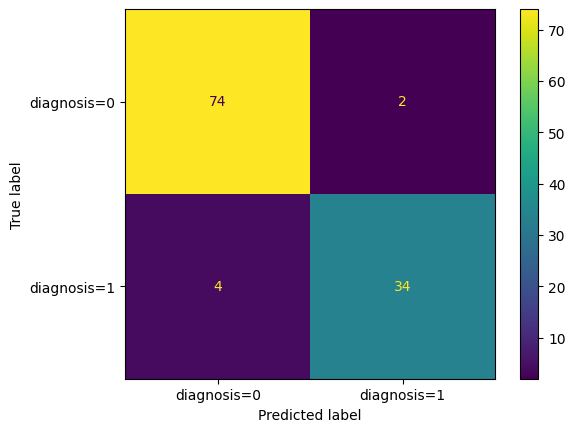

In [ ]:
# Define the hyperparameters for each algorithm
logistic_regression_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

knn_params = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

naive_bayes_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

mlp_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the classifiers
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()
mlp = MLPClassifier()

# Define the hyperparameters dictionary for each classifier
classifiers = {
    'Logistic Regression': [logistic_regression, logistic_regression_params],
    'SVM': [svm, svm_params],
    'KNN': [knn, knn_params],
    'Naive Bayes': [naive_bayes, naive_bayes_params],
    'Decision Tree': [decision_tree, decision_tree_params],
    'Random Forest': [random_forest, random_forest_params],
    'GBM': [gbm, gbm_params],
    'MLP': [mlp, mlp_params]
}

# Define the feature selection methods
univariate_selection = SelectKBest(score_func=f_classif)
recursive_feature_elimination = RFECV(estimator=RandomForestClassifier())
principal_component_analysis = PCA(n_components=10)
linear_discriminant_analysis = LinearDiscriminantAnalysis()
tree_based_feature_selection = SelectFromModel(RandomForestClassifier())

# Create a dictionary of feature selection methods to loop through
feature_selection_methods = {
'Univariate Selection': univariate_selection,
'Recursive Feature Elimination': recursive_feature_elimination,
'Principal Component Analysis': principal_component_analysis,
'Linear Discriminant Analysis': linear_discriminant_analysis,
'Tree-based Feature Selection': tree_based_feature_selection
}

# Perform cross-validation on each classifier with best hyperparameters
for name, [classifier, params] in classifiers.items():
    for fs_name, fs_method in feature_selection_methods.items():
      # Log evaluation metrics and model artifacts to MLflow
      with mlflow.start_run():
          mlflow.set_tag("dev", "Rinku")
          mlflow.set_tag("Balancing_Method", "OverSampling")
          mlflow.set_tag("Feature_Selection", "Yes")

          mlflow.set_tag("algo", name)
          mlflow.log_param("data-path", "data/bcd.csv")
          mlflow.log_param('Feature selection method', fs_name)
          print('Feature Selection Method:', fs_name)
          # Apply the feature selection method on the training data
          X_train_fs = fs_method.fit_transform(X_train_res_scaled, y_res)
          X_test_fs = fs_method.transform(X_test_res_scaled)
          # Check if the feature selection method is LDA
          if fs_name == 'Linear Discriminant Analysis':
              # For LDA, get the coefficients of the linear discriminant function
              coef = fs_method.coef_[0]
              abs_coef = np.abs(coef)
              num_features = 10
              feature_names = np.array(X_train.columns)[np.argsort(abs_coef)[::-1]][:num_features]
          elif fs_name == 'Principal Component Analysis':
              # For PCA, get the number of components used and construct dummy feature names
              num_components = fs_method.n_components_
              feature_names = ['PC{}'.format(i+1) for i in range(num_components)]
          else:
              # For other feature selection methods, get the boolean mask of selected features and retrieve feature names
              feature_mask = fs_method.get_support()
              feature_names = X_train.columns[feature_mask]

          # Print the selected features
          print(f'Selected Features for {fs_name}: {feature_names}\n')

          # Log the feature names as an artifact file
          with open('feature_names_os.txt', 'w') as f:
              f.write('\n'.join(feature_names))
          mlflow.log_artifact('feature_names_os.txt')

          print(f'Evaluating {name} with best hyperparameters...')
          search = RandomizedSearchCV(
              classifier,
              params,
              cv=5,
              n_iter=10,
              random_state=42,
              n_jobs=-1
          )
          search.fit(X_train_fs, y_res)
          print(f'Best hyperparameters for {name}: {search.best_params_}')
          print("\n\n")
          mlflow.log_params(best_params)
          best_model = search.best_estimator_
          scores = cross_val_score(best_model, X_train_fs, y_res, cv=5, scoring='accuracy')
          print(f'{name} 5-fold cross-validation scores: {scores}')
          print(f'{name} mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')
          best_model.fit(X_train_fs, y_res)
          y_pred = best_model.predict(X_test_fs)
          score = metrics.accuracy_score(y_test, y_pred)
          mlflow.log_metric('accuracy', score)
          print(f'{name} test accuracy: {score:.4f}')
          print(classification_report(y_test, y_pred))
          cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, y_pred), display_labels=["diagnosis=0", "diagnosis=1"])
          cm_display.plot()
          plt.show()

          mlflow.sklearn.log_model(best_model, artifact_path="models")
          mlflow.log_artifact("pickle_files/standard_scaler_bc.pkl")

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'none', 'C': 0.1}



Logistic Regression 5-fold cross-validation scores: [0.95714286 0.94285714 0.97142857 0.97101449 0.94202899]
Logistic Regression mean accuracy: 0.9569 (+/- 0.0129)
Logistic Regression test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.90      0.92      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       1

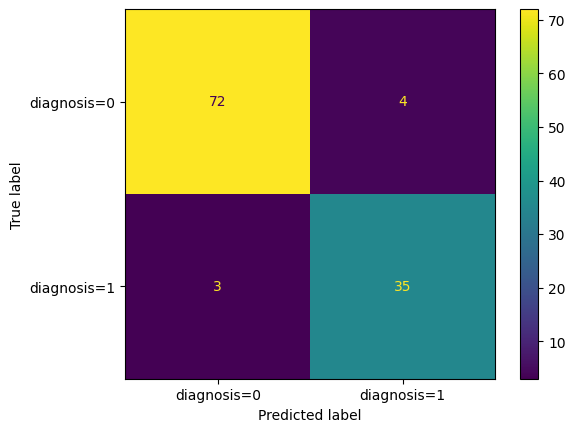

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'none', 'C': 0.1}



Logistic Regression 5-fold cross-validation scores: [0.95714286 0.97142857 0.98571429 1.         0.97101449]
Logistic Regression mean accuracy: 0.9771 (+/- 0.0146)
Logistic Regression test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.9

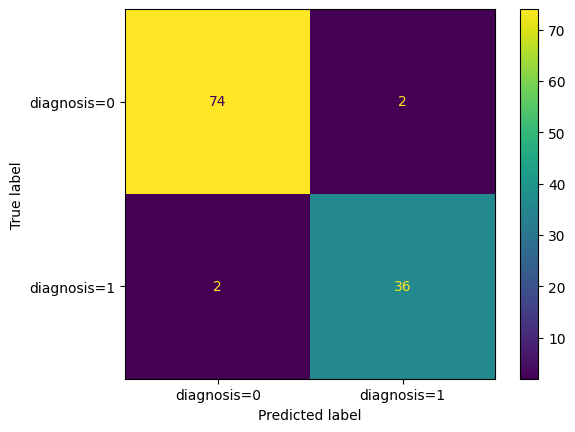

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'sag', 'penalty': 'none', 'C': 0.1}



Logistic Regression 5-fold cross-validation scores: [0.97142857 0.95714286 0.98571429 1.         0.95652174]
Logistic Regression mean accuracy: 0.9742 (+/- 0.0168)
Logistic Regression test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.93      0.97      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



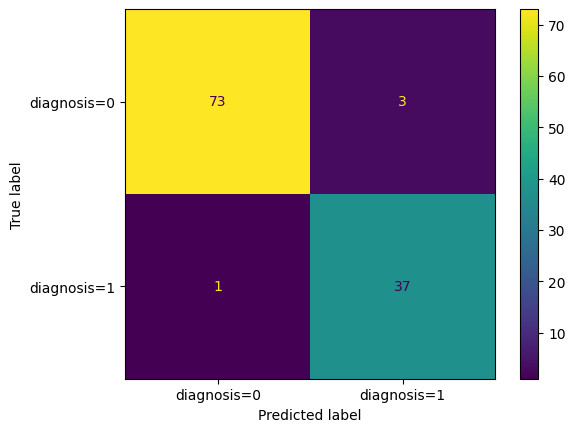

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}



Logistic Regression 5-fold cross-validation scores: [0.97142857 0.97142857 0.98571429 1.         0.98550725]
Logistic Regression mean accuracy: 0.9828 (+/- 0.0107)
Logistic Regression test accuracy: 0.9474
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        76
           1       0.86      1.00      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



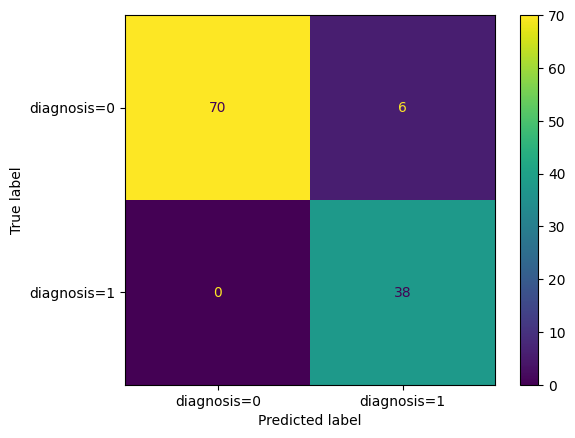

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Logistic Regression with best hyperparameters...
Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}



Logistic Regression 5-fold cross-validation scores: [0.95714286 0.95714286 0.98571429 0.98550725 0.94202899]
Logistic Regression mean accuracy: 0.9655 (+/- 0.0173)
Logistic Regression test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.90      0.92      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94    

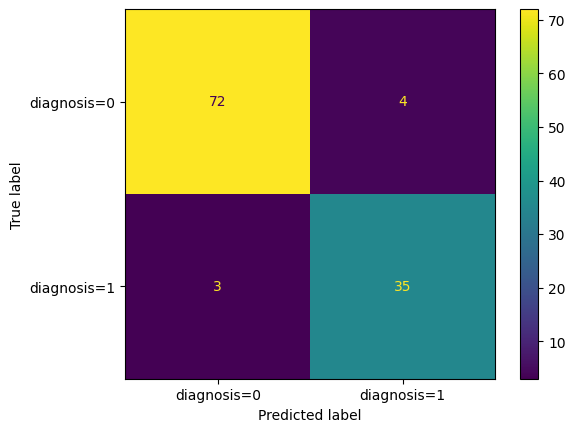

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 1}



SVM 5-fold cross-validation scores: [0.95714286 0.94285714 1.         0.97101449 0.94202899]
SVM mean accuracy: 0.9626 (+/- 0.0215)
SVM test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.90      0.92      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



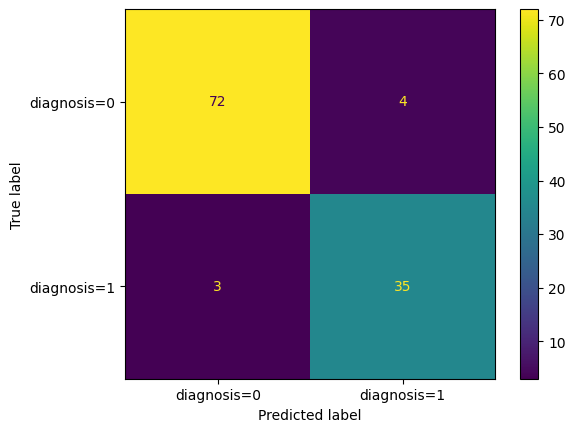

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}



SVM 5-fold cross-validation scores: [0.97142857 0.97142857 1.         0.97101449 0.98550725]
SVM mean accuracy: 0.9799 (+/- 0.0115)
SVM test accuracy: 0.9737
              precision    recall  f1-s

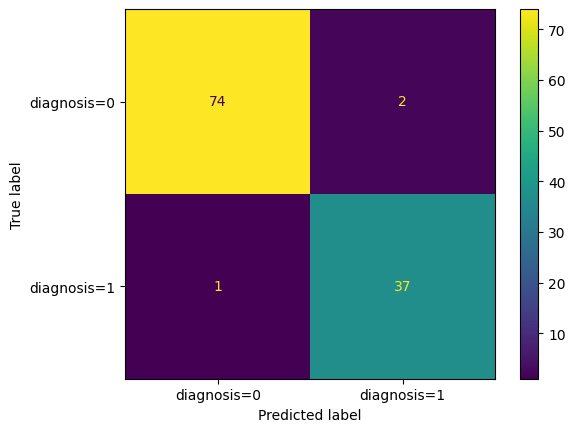

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}



SVM 5-fold cross-validation scores: [0.98571429 0.95714286 0.98571429 0.98550725 0.98550725]
SVM mean accuracy: 0.9799 (+/- 0.0114)
SVM test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.95      0.97      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



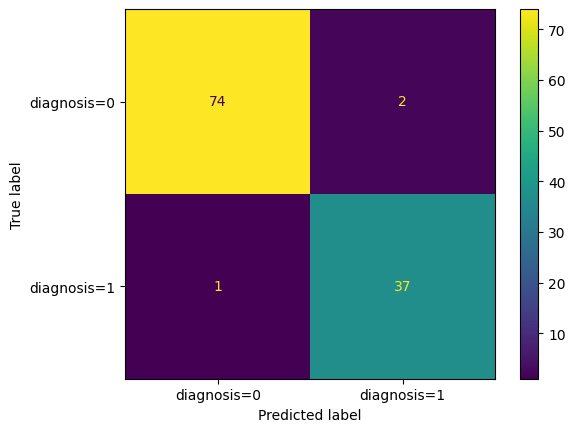

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 100}



SVM 5-fold cross-validation scores: [0.97142857 0.98571429 0.98571429 1.         0.98550725]
SVM mean accuracy: 0.9857 (+/- 0.0090)
SVM test accuracy: 0.9474
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        76
           1       0.86      1.00      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



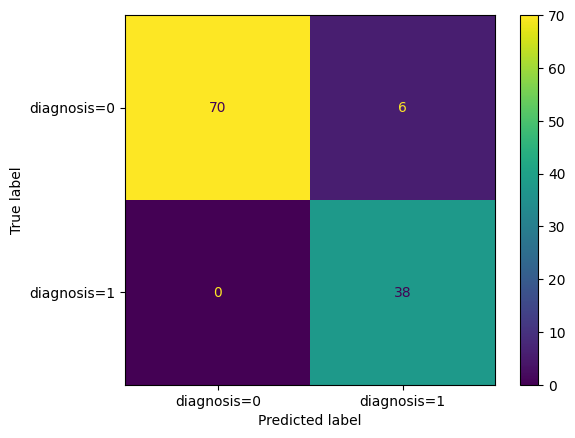

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')

Evaluating SVM with best hyperparameters...
Best hyperparameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 100}



SVM 5-fold cross-validation scores: [0.94285714 0.95714286 1.         1.         0.92753623]
SVM mean accuracy: 0.9655 (+/- 0.0297)
SVM test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.87      0.89      0.88        38

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



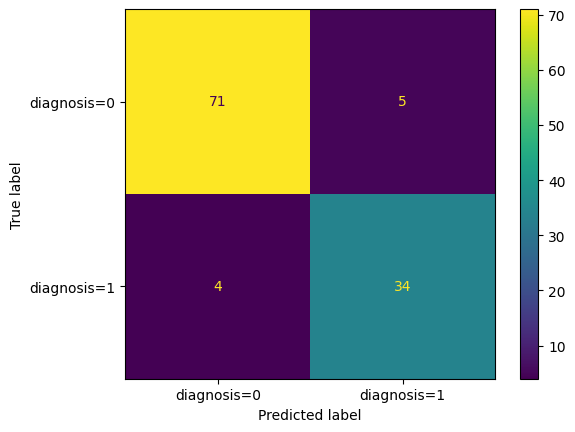

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 20}



KNN 5-fold cross-validation scores: [0.94285714 0.94285714 0.97142857 0.98550725 0.97101449]
KNN mean accuracy: 0.9627 (+/- 0.0170)
KNN test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



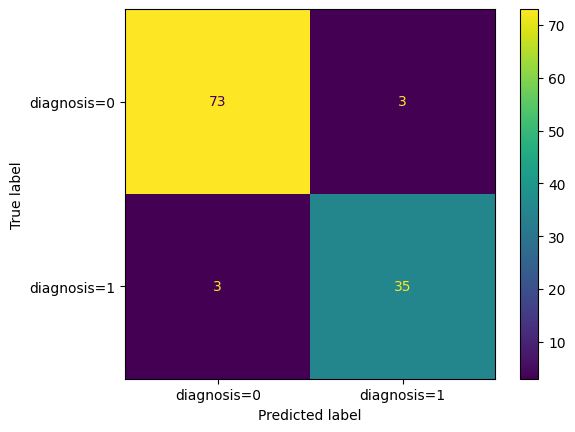

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['area_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 10}



KNN 5-fold cross-validation scores: [0.94285714 0.94285714 1.         1.         0.95652174]
KNN mean accuracy: 0.9684 (+/- 0.0262)
KNN test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



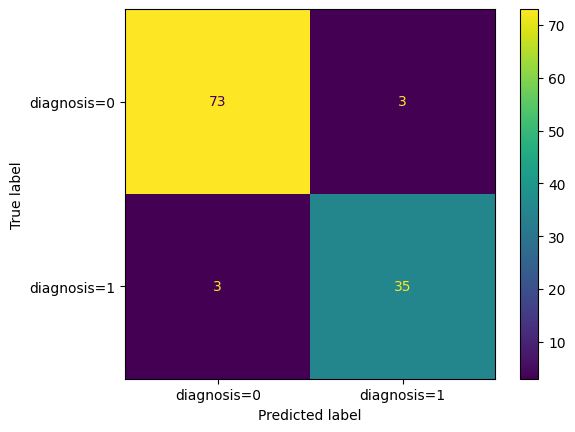

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 10}



KNN 5-fold cross-validation scores: [0.97142857 0.94285714 0.98571429 0.97101449 0.97101449]
KNN mean accuracy: 0.9684 (+/- 0.0140)
KNN test accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.95      0.97        38

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



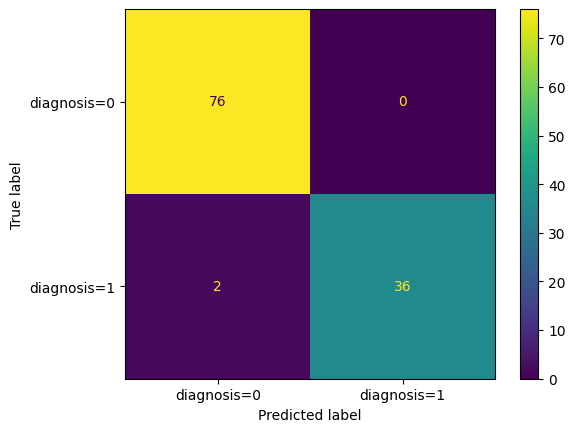

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'uniform', 'p': 2, 'n_neighbors': 20}



KNN 5-fold cross-validation scores: [0.97142857 0.97142857 0.98571429 1.         0.98550725]
KNN mean accuracy: 0.9828 (+/- 0.0107)
KNN test accuracy: 0.9649
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        76
           1       0.90      1.00      0.95        38

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



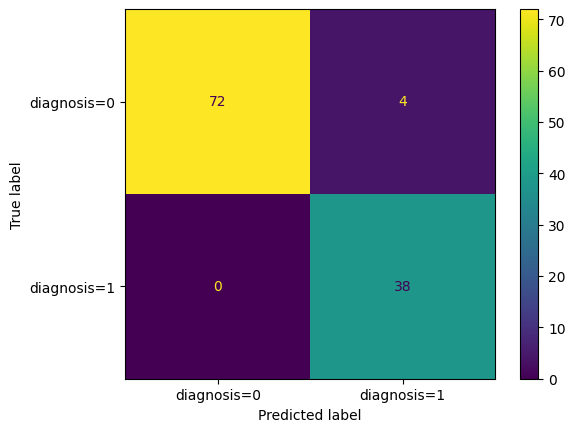

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Evaluating KNN with best hyperparameters...
Best hyperparameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 20}



KNN 5-fold cross-validation scores: [0.95714286 0.94285714 1.         0.98550725 0.97101449]
KNN mean accuracy: 0.9713 (+/- 0.0202)
KNN test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        76
           1       0.85      0.92      0.89        38

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



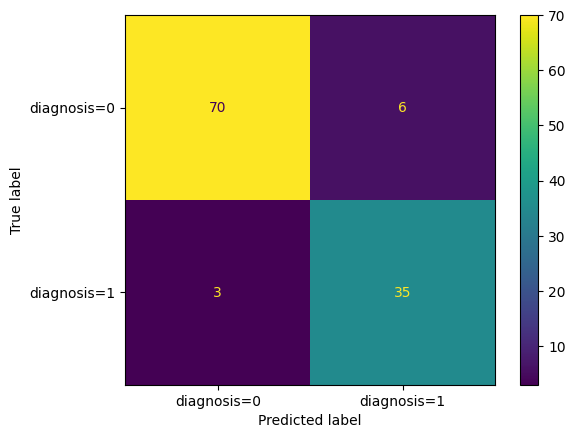

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 0.01}



Naive Bayes 5-fold cross-validation scores: [0.94285714 0.95714286 0.95714286 0.95652174 0.94202899]
Naive Bayes mean accuracy: 0.9511 (+/- 0.0071)
Naive Bayes test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        76
           1       0.97      0.87      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



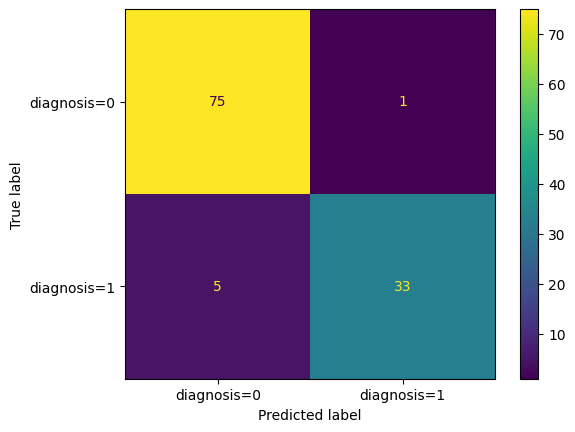

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}



Naive Bayes 5-fold cross-validation scores: [0.9        0.92857143 0.97142857 0.92753623 0.91304348]
Naive Bayes mean accuracy: 0.9281 (+/- 0.0241)
Naive Ba

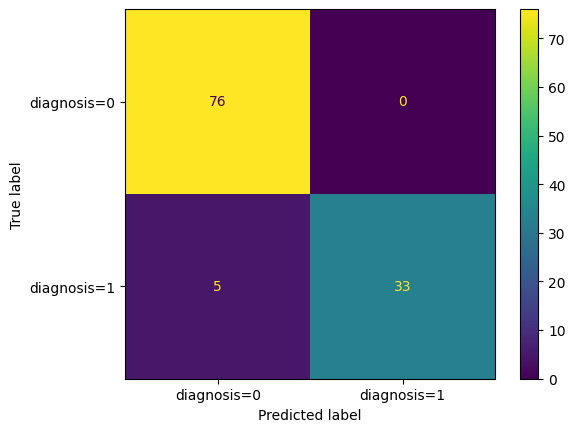

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 0.0002848035868435802}



Naive Bayes 5-fold cross-validation scores: [0.87142857 0.91428571 0.97142857 0.91304348 0.89855072]
Naive Bayes mean accuracy: 0.9137 (+/- 0.0327)
Naive Bayes test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.94      0.89      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



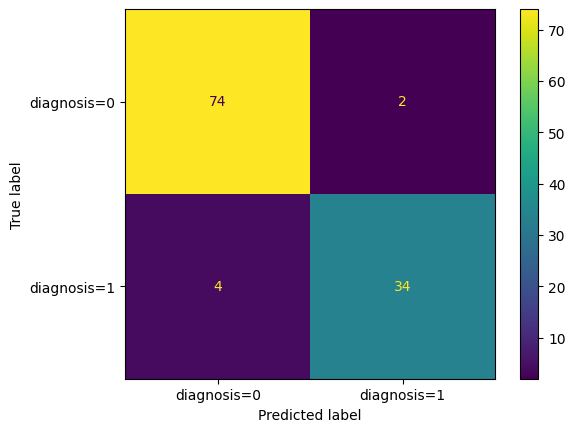

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}



Naive Bayes 5-fold cross-validation scores: [0.97142857 0.97142857 0.98571429 1.         0.98550725]
Naive Bayes mean accuracy: 0.9828 (+/- 0.0107)
Naive Bayes test accuracy: 0.9474
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        76
           1       0.86      1.00      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



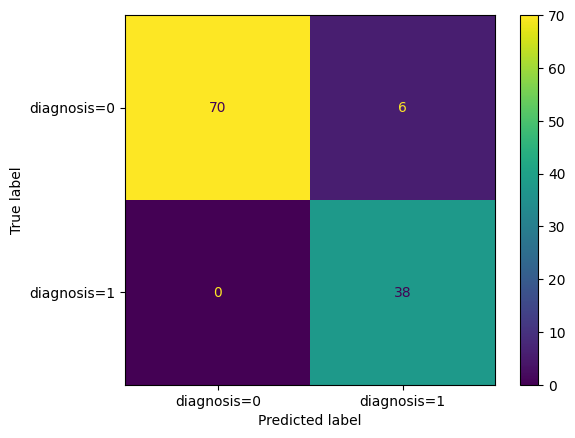

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Evaluating Naive Bayes with best hyperparameters...
Best hyperparameters for Naive Bayes: {'var_smoothing': 2.848035868435799e-08}



Naive Bayes 5-fold cross-validation scores: [0.91428571 0.94285714 0.95714286 0.95652174 0.94202899]
Naive Bayes mean accuracy: 0.9426 (+/- 0.0155)
Naive Bayes test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        76
           1       0.89      0.87      0.88        38

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



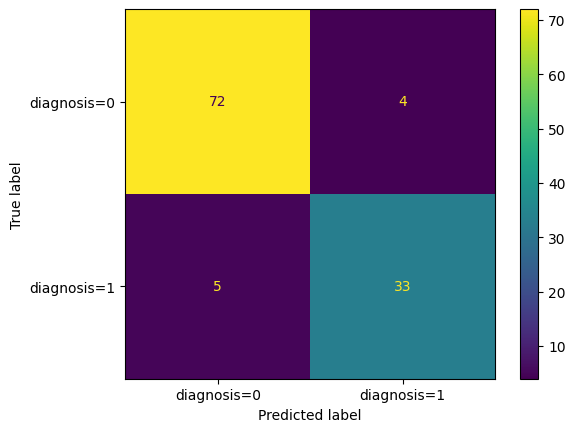

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}



Decision Tree 5-fold cross-validation scores: [0.91428571 0.91428571 0.92857143 0.95652174 0.94202899]
Decision Tree mean accuracy: 0.9311 (+/- 0.0164)
Decision Tree test accuracy: 0.9123
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        76
           1       0.85      0.89      0.87        38

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg 

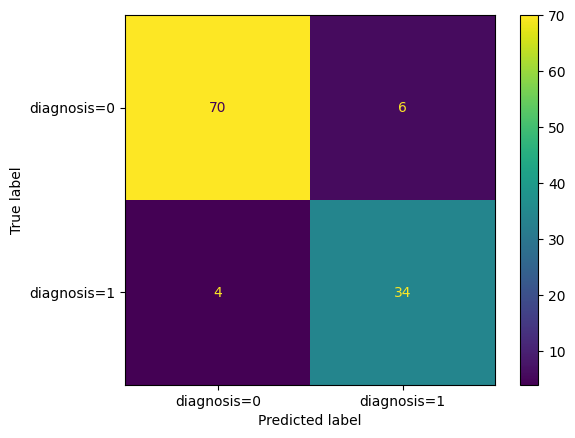

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se',
       'perimeter_se', 'area_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}



Decision Tree 5-fold cross-validation scores: [0.94285714 0.94285714 0.97142857 0.97101449 0.94202899]
Decision Tree mean accuracy: 0.9540 (+/- 0.0140)
Decision Tree test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.

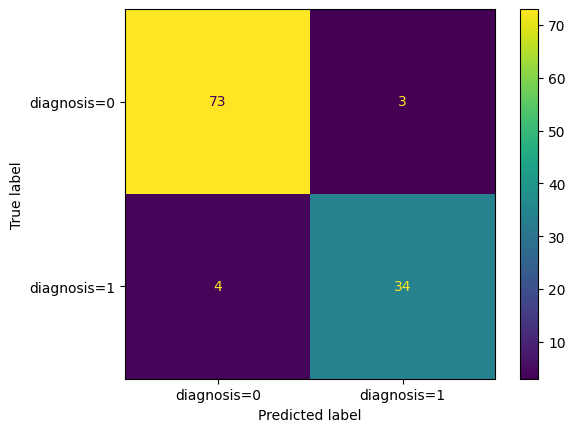

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}



Decision Tree 5-fold cross-validation scores: [0.82857143 0.9        0.9        0.94202899 0.92753623]
Decision Tree mean accuracy: 0.8996 (+/- 0.0391)
Decision Tree test accuracy: 0.9035
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        76
           1       0.85      0.87      0.86        38

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



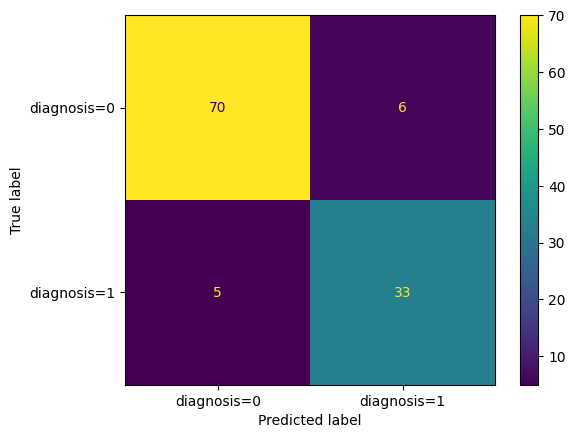

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}



Decision Tree 5-fold cross-validation scores: [0.98571429 0.94285714 0.98571429 0.98550725 0.98550725]
Decision Tree mean accuracy: 0.9771 (+/- 0.0171)
Decision Tree test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        76
           1       0.82      0.97      0.89        38

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



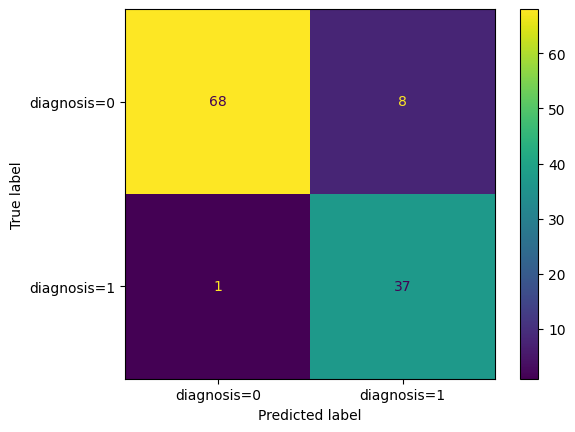

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Decision Tree with best hyperparameters...
Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}



Decision Tree 5-fold cross-validation scores: [0.95714286 0.94285714 0.95714286 0.97101449 0.92753623]
Decision Tree mean accuracy: 0.9511 (+/- 0.0148)
Decision Tree test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.87      0.89      0.88        38

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91

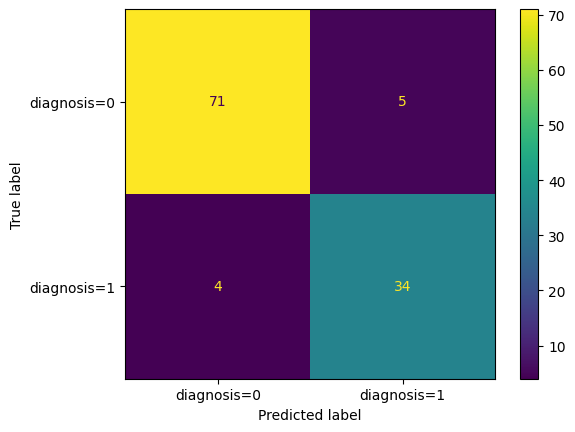

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}



Random Forest 5-fold cross-validation scores: [0.95714286 0.94285714 0.97142857 0.98550725 0.97101449]
Random Forest mean accuracy: 0.9656 (+/- 0.0145)
Random Forest test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.90      0.92      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg      

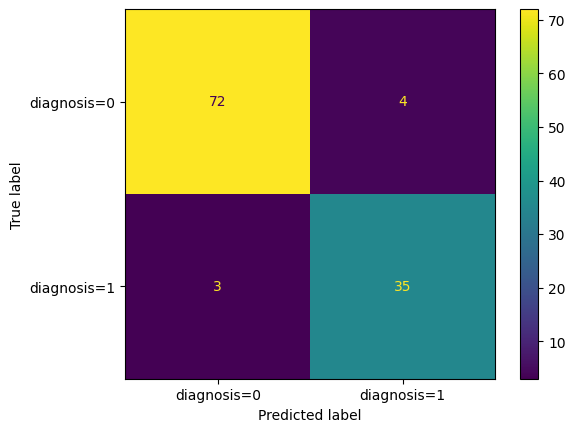

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}



Random Forest 5-fold cross-validation scores: [0.92857143 0.95714286 0.94285714 0.98550725 0.95652174]
Random Forest mean accuracy: 0.9541 (+/- 0.0189)
Random Forest test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.95      0.96        38

    accuracy                

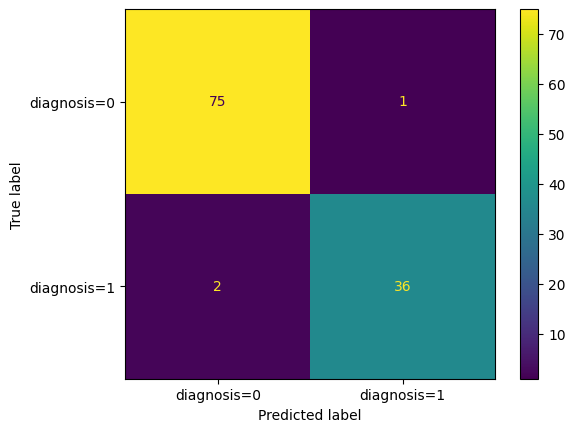

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}



Random Forest 5-fold cross-validation scores: [0.91428571 0.92857143 1.         0.98550725 0.97101449]
Random Forest mean accuracy: 0.9599 (+/- 0.0330)
Random Forest test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



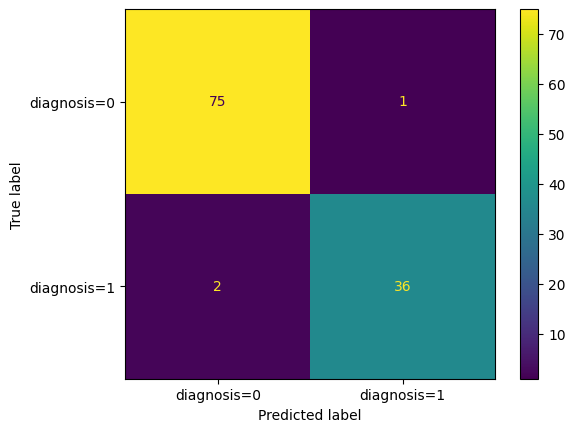

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}



Random Forest 5-fold cross-validation scores: [0.97142857 0.97142857 0.98571429 0.97101449 0.98550725]
Random Forest mean accuracy: 0.9770 (+/- 0.0070)
Random Forest test accuracy: 0.9474
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        76
           1       0.86      1.00      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



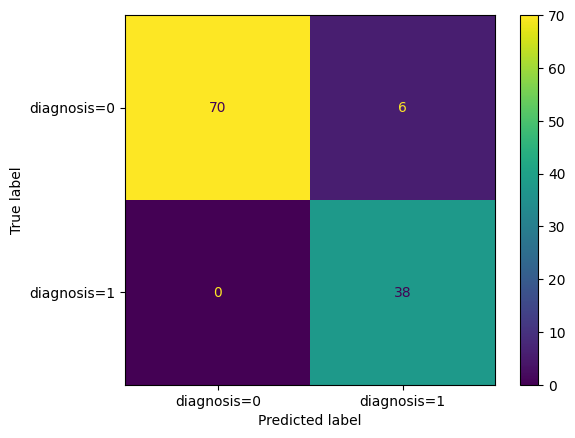

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating Random Forest with best hyperparameters...
Best hyperparameters for Random Forest: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}



Random Forest 5-fold cross-validation scores: [0.95714286 0.95714286 0.98571429 0.97101449 0.94202899]
Random Forest mean accuracy: 0.9626 (+/- 0.0147)
Random Forest test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.90      0.92      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
w

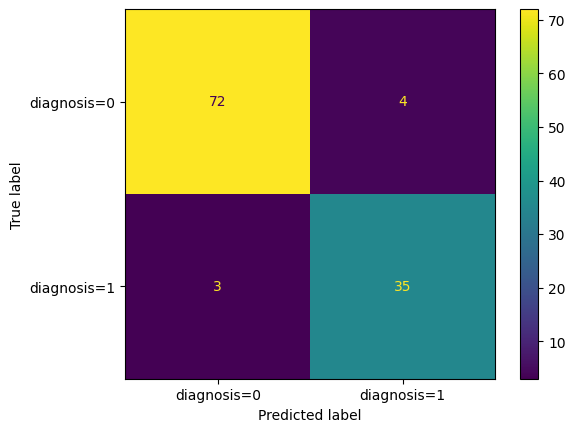

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'learning_rate': 0.1}



GBM 5-fold cross-validation scores: [0.95714286 0.94285714 0.97142857 0.98550725 0.97101449]
GBM mean accuracy: 0.9656 (+/- 0.0145)
GBM test accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.90      0.92      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94  

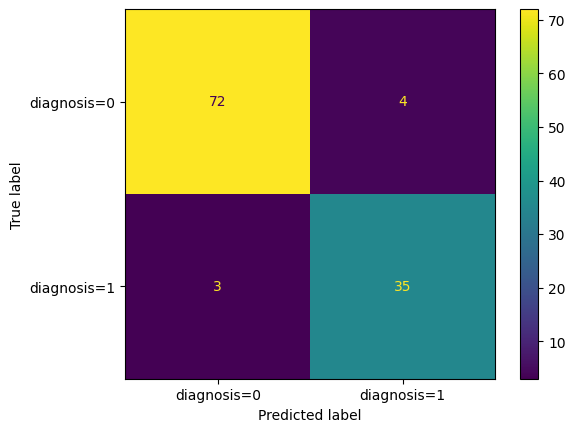

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'symmetry_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'learning_rate': 0.1}



GBM 5-fold cross-validation scores: [0.97142857 0.97142857 0.97142857 0.97101449 0.95652174]
GBM mean accuracy: 0.9684 (+/- 0.0059)
GBM test accuracy: 0.9649
              precision    reca

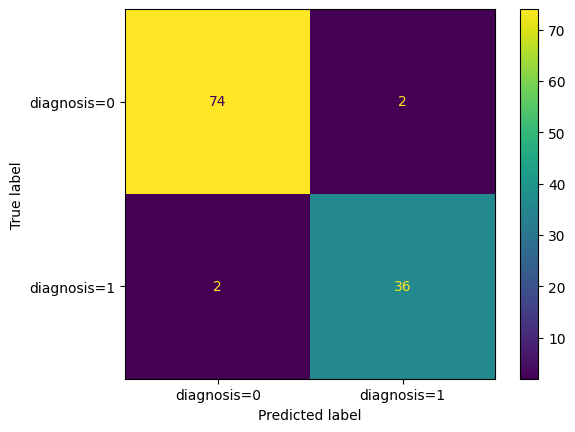

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.5}



GBM 5-fold cross-validation scores: [0.94285714 0.92857143 1.         0.95652174 0.97101449]
GBM mean accuracy: 0.9598 (+/- 0.0246)
GBM test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.95      0.97      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



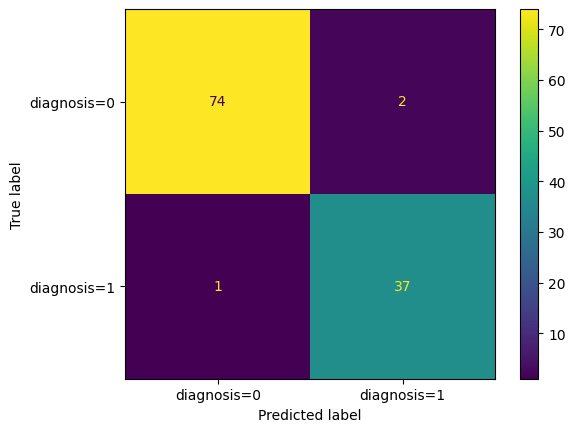

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'learning_rate': 0.01}



GBM 5-fold cross-validation scores: [0.98571429 0.94285714 0.98571429 0.98550725 0.98550725]
GBM mean accuracy: 0.9771 (+/- 0.0171)
GBM test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        76
           1       0.82      0.97      0.89        38

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



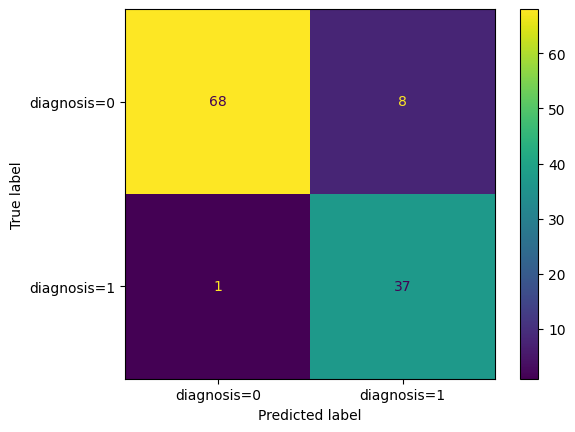

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating GBM with best hyperparameters...
Best hyperparameters for GBM: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'learning_rate': 0.01}



GBM 5-fold cross-validation scores: [0.94285714 0.94285714 0.97142857 0.98550725 0.97101449]
GBM mean accuracy: 0.9627 (+/- 0.0170)
GBM test accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        76
           1       0.89      0.89      0.89        38

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93

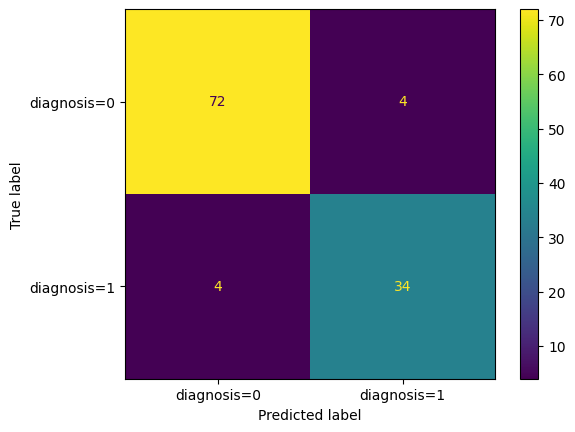

Feature Selection Method: Univariate Selection
Selected Features for Univariate Selection: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.94285714 0.95714286 0.97142857 0.98550725 0.95652174]
MLP mean accuracy: 0.9627 (+/- 0.0146)
MLP test accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        76
           1       0.85      0.92      0.89        38

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



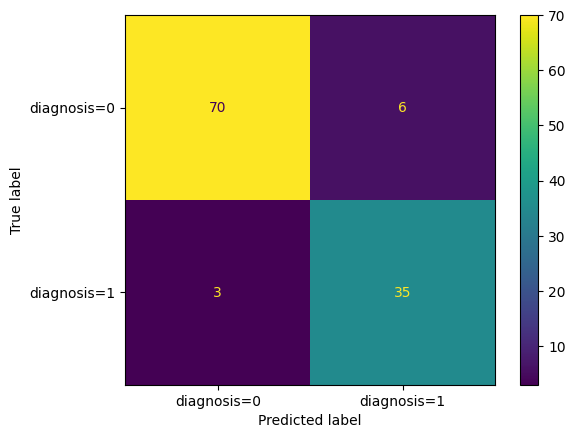

Feature Selection Method: Recursive Feature Elimination
Selected Features for Recursive Feature Elimination: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.97142857 0.94285714 0.97142857 0.98550725 0.97101449]
MLP mean accuracy: 0.9684 (+/- 0.0139)
MLP test accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.

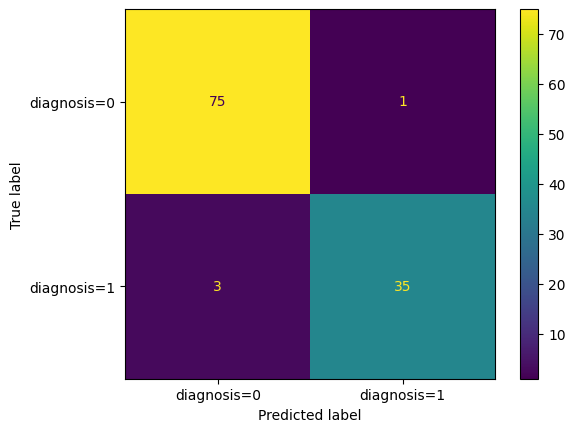

Feature Selection Method: Principal Component Analysis
Selected Features for Principal Component Analysis: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.98571429 0.97142857 0.98571429 0.97101449 0.98550725]
MLP mean accuracy: 0.9799 (+/- 0.0071)
MLP test accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.95      0.97      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



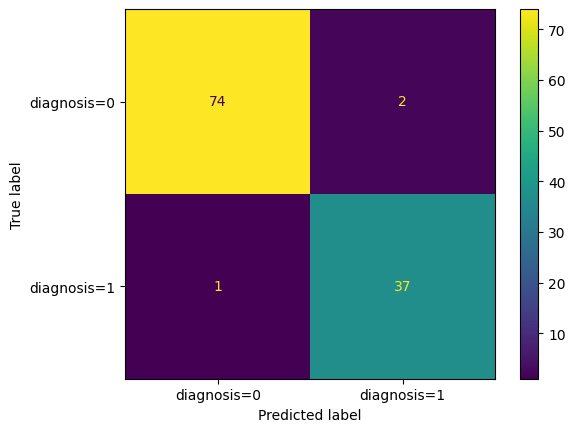

Feature Selection Method: Linear Discriminant Analysis
Selected Features for Linear Discriminant Analysis: ['perimeter_mean' 'radius_mean' 'radius_worst' 'area_worst'
 'compactness_mean' 'radius_se' 'area_mean' 'perimeter_se'
 'fractal_dimension_worst' 'concave points_se']

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.97142857 0.97142857 0.98571429 1.         0.98550725]
MLP mean accuracy: 0.9828 (+/- 0.0107)
MLP test accuracy: 0.9474
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        76
           1       0.86      1.00      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



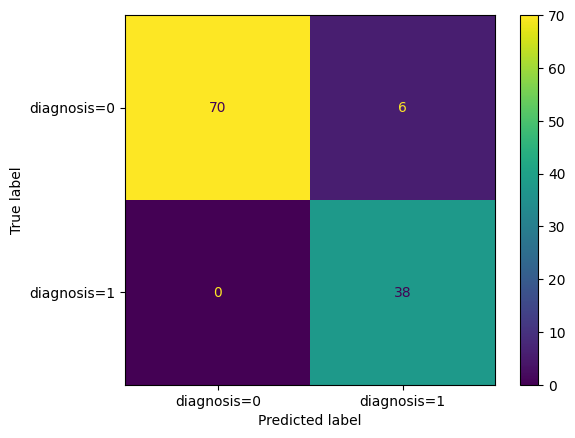

Feature Selection Method: Tree-based Feature Selection
Selected Features for Tree-based Feature Selection: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

Evaluating MLP with best hyperparameters...
Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}



MLP 5-fold cross-validation scores: [0.94285714 0.95714286 0.97142857 1.         0.95652174]
MLP mean accuracy: 0.9656 (+/- 0.0194)
MLP test accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        76
           1       0.89      0.89      0.89        38

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93

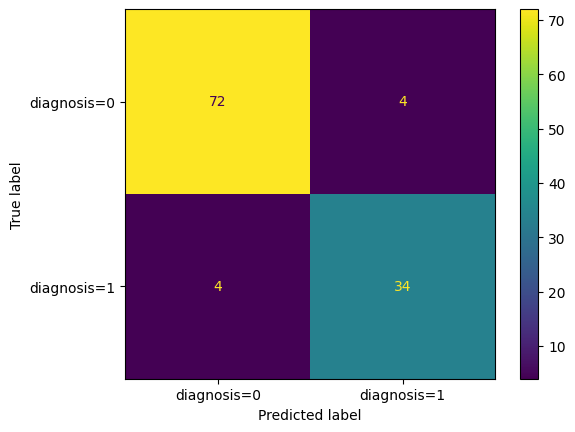

In [ ]:
# Define the hyperparameters for each algorithm
logistic_regression_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

knn_params = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

naive_bayes_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

mlp_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the classifiers
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()
mlp = MLPClassifier()

# Define the hyperparameters dictionary for each classifier
classifiers = {
    'Logistic Regression': [logistic_regression, logistic_regression_params],
    'SVM': [svm, svm_params],
    'KNN': [knn, knn_params],
    'Naive Bayes': [naive_bayes, naive_bayes_params],
    'Decision Tree': [decision_tree, decision_tree_params],
    'Random Forest': [random_forest, random_forest_params],
    'GBM': [gbm, gbm_params],
    'MLP': [mlp, mlp_params]
}

# Define the feature selection methods
univariate_selection = SelectKBest(score_func=f_classif)
recursive_feature_elimination = RFECV(estimator=RandomForestClassifier())
principal_component_analysis = PCA(n_components=10)
linear_discriminant_analysis = LinearDiscriminantAnalysis()
tree_based_feature_selection = SelectFromModel(RandomForestClassifier())

# Create a dictionary of feature selection methods to loop through
feature_selection_methods = {
'Univariate Selection': univariate_selection,
'Recursive Feature Elimination': recursive_feature_elimination,
'Principal Component Analysis': principal_component_analysis,
'Linear Discriminant Analysis': linear_discriminant_analysis,
'Tree-based Feature Selection': tree_based_feature_selection
}

# Perform cross-validation on each classifier with best hyperparameters
for name, [classifier, params] in classifiers.items():
    for fs_name, fs_method in feature_selection_methods.items():
      # Log evaluation metrics and model artifacts to MLflow
      with mlflow.start_run():
          mlflow.set_tag("dev", "Rinku")
          mlflow.set_tag("Balancing_Method", "UnderSampling")
          mlflow.set_tag("Feature_Selection", "Yes")

          mlflow.set_tag("algo", name)
          mlflow.log_param("data-path", "data/bcd.csv")
          mlflow.log_param('Feature selection method', fs_name)
          print('Feature Selection Method:', fs_name)
          # Apply the feature selection method on the training data
          X_train_fs = fs_method.fit_transform(X_train_rus_scaled, y_rus)
          X_test_fs = fs_method.transform(X_test_rus_scaled)
          # Check if the feature selection method is LDA
          if fs_name == 'Linear Discriminant Analysis':
              # For LDA, get the coefficients of the linear discriminant function
              coef = fs_method.coef_[0]
              abs_coef = np.abs(coef)
              num_features = 10
              feature_names = np.array(X_train.columns)[np.argsort(abs_coef)[::-1]][:num_features]
          elif fs_name == 'Principal Component Analysis':
              # For PCA, get the number of components used and construct dummy feature names
              num_components = fs_method.n_components_
              feature_names = ['PC{}'.format(i+1) for i in range(num_components)]
          else:
              # For other feature selection methods, get the boolean mask of selected features and retrieve feature names
              feature_mask = fs_method.get_support()
              feature_names = X_train.columns[feature_mask]

          # Print the selected features
          print(f'Selected Features for {fs_name}: {feature_names}\n')

          # Log the feature names as an artifact file
          with open('feature_names_us.txt', 'w') as f:
              f.write('\n'.join(feature_names))
          mlflow.log_artifact('feature_names_us.txt')

          print(f'Evaluating {name} with best hyperparameters...')

          search = RandomizedSearchCV(
              classifier,
              params,
              cv=5,
              n_iter=10,
              random_state=42,
              n_jobs=-1
          )
          search.fit(X_train_fs, y_rus)
          print(f'Best hyperparameters for {name}: {search.best_params_}')
          print("\n\n")
          mlflow.log_params(best_params)
          best_model = search.best_estimator_
          scores = cross_val_score(best_model, X_train_fs, y_rus, cv=5, scoring='accuracy')
          print(f'{name} 5-fold cross-validation scores: {scores}')
          print(f'{name} mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')
          best_model.fit(X_train_fs, y_rus)
          y_pred = best_model.predict(X_test_fs)
          score = metrics.accuracy_score(y_test, y_pred)
          mlflow.log_metric('accuracy', score)
          print(f'{name} test accuracy: {score:.4f}')
          print(classification_report(y_test, y_pred))
          cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, y_pred), display_labels=["diagnosis=0", "diagnosis=1"])
          cm_display.plot()
          plt.show()

          mlflow.sklearn.log_model(best_model, artifact_path="models")
          mlflow.log_artifact("pickle_files/standard_scaler_bc.pkl")